In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
# import folium 
# from folium.plugins import HeatMap

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
df = pd.read_csv('./iFlowDatos_Limpios.csv')

In [3]:
iflow_colors = [
    "#636967",  # Corduroy
    "#272727",  # Mine Shaft
    "#aeafae",  # Edward
    "#f2f2f2",  # Concrete
    "#96c01f",  # Citron
    "#363836",  # Lunar Green
    "#c2c5bd",  # Kangaroo
    "#767773",  # Friar Gray
    "#8eb341",  # Sushi
    "#8f8f9f",  # Manatee
    "#8eb440",  # Sushi_2
    "#737473",  # Xanadu
    "#5e7223",  # Fern Frond
    "#070807"   # Log Cabin
]



# PRINCIPAL

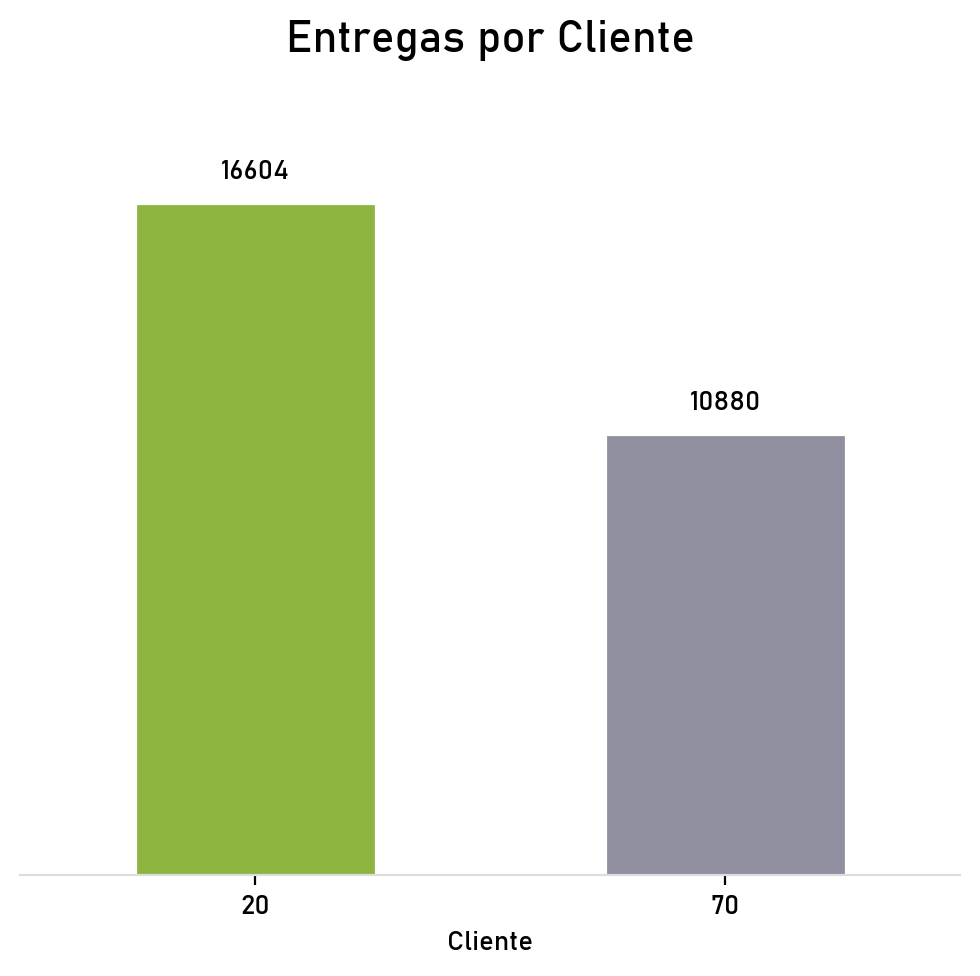

In [4]:
entregas_por_cliente = df['cliente'].value_counts().reset_index().rename(columns={'cliente':'cantidad','index':'cliente'})
mpl.rcParams['font.family'] = 'Bahnschrift'
# Create the bar plot
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='cliente', y='cantidad', width=.5, data=entregas_por_cliente)

colors = ['#8eb440', '#8f8f9f']  # Colores deseados
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

# Customize appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)
plt.ylim(0, 20000)

# Add text labels on the bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, int(yval), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Cliente')
plt.title('Entregas por Cliente', fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 300x500 with 0 Axes>

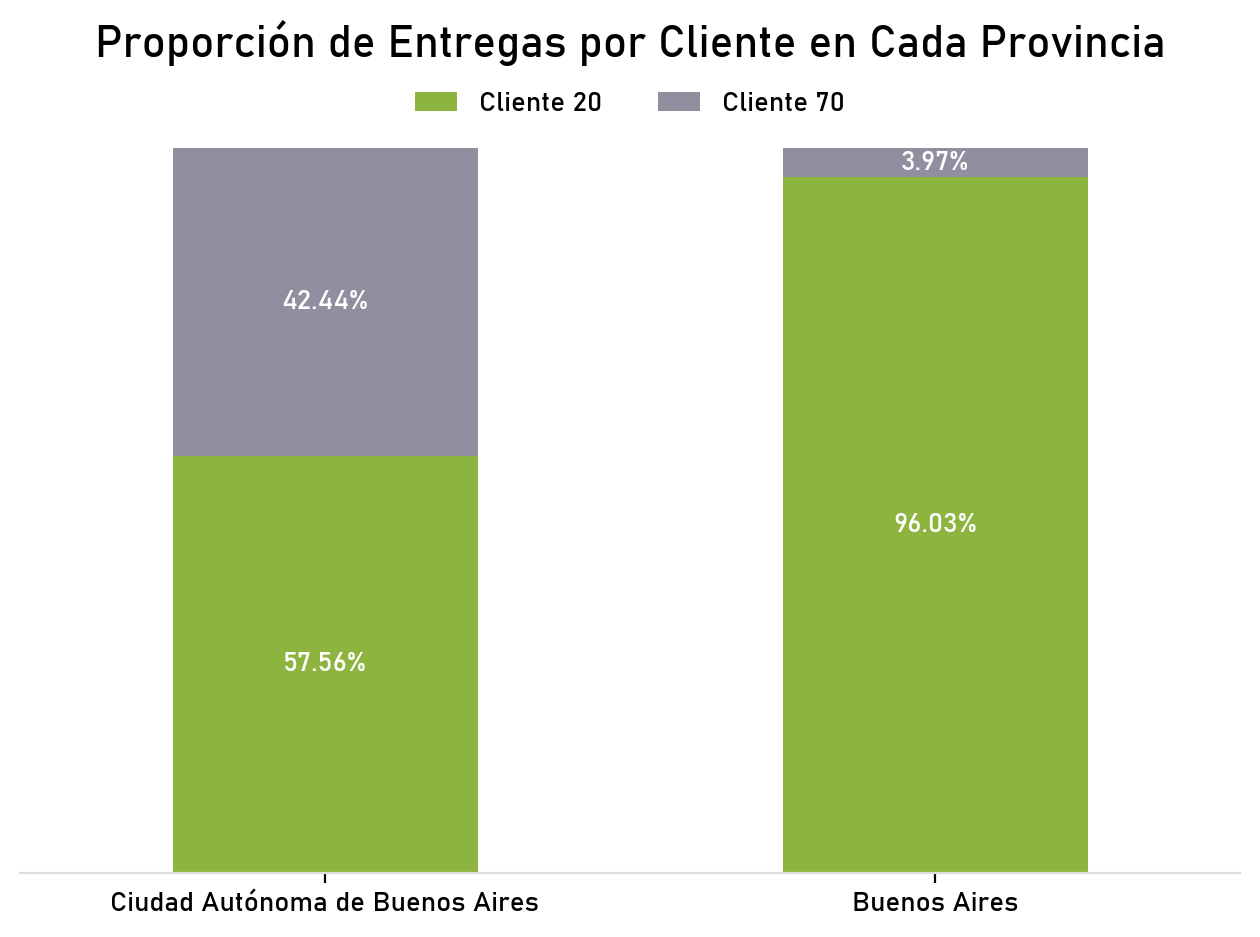

In [5]:
counts = df[['provincia', 'cliente']].value_counts().unstack()
proportions = counts.div(counts.sum(axis=1), axis=0).sort_index(ascending=False)

# Crear el gráfico de barras apiladas
mpl.rcParams['font.family'] = 'Bahnschrift'
plt.figure(figsize=(3, 5))

# Colores deseados para cada cliente
colors = ['#8eb440', '#8f8f9f']

# Crear el gráfico de barras apiladas
ax = proportions.plot(kind='bar', stacked=True, width=0.5, color=colors)

# Personaliza la apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)
legend_labels = ['Cliente 20', 'Cliente 70']
ax.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.06), fontsize=10, frameon=False, ncol=2, handlelength=1.5)

# Añadir etiquetas de texto en las barras
for i in range(len(proportions)):
    for j, bar in enumerate(ax.patches[i*len(counts.columns):(i+1)*len(counts.columns)]):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + yval/2, f'{yval:.2%}', 
                 ha='center', va='center', fontsize=10, color='white',)

plt.xticks(rotation=0)
plt.xlabel('', fontsize=12,)
plt.title('Proporción de Entregas por Cliente en Cada Provincia', fontsize=16, fontweight='bold', pad=20)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

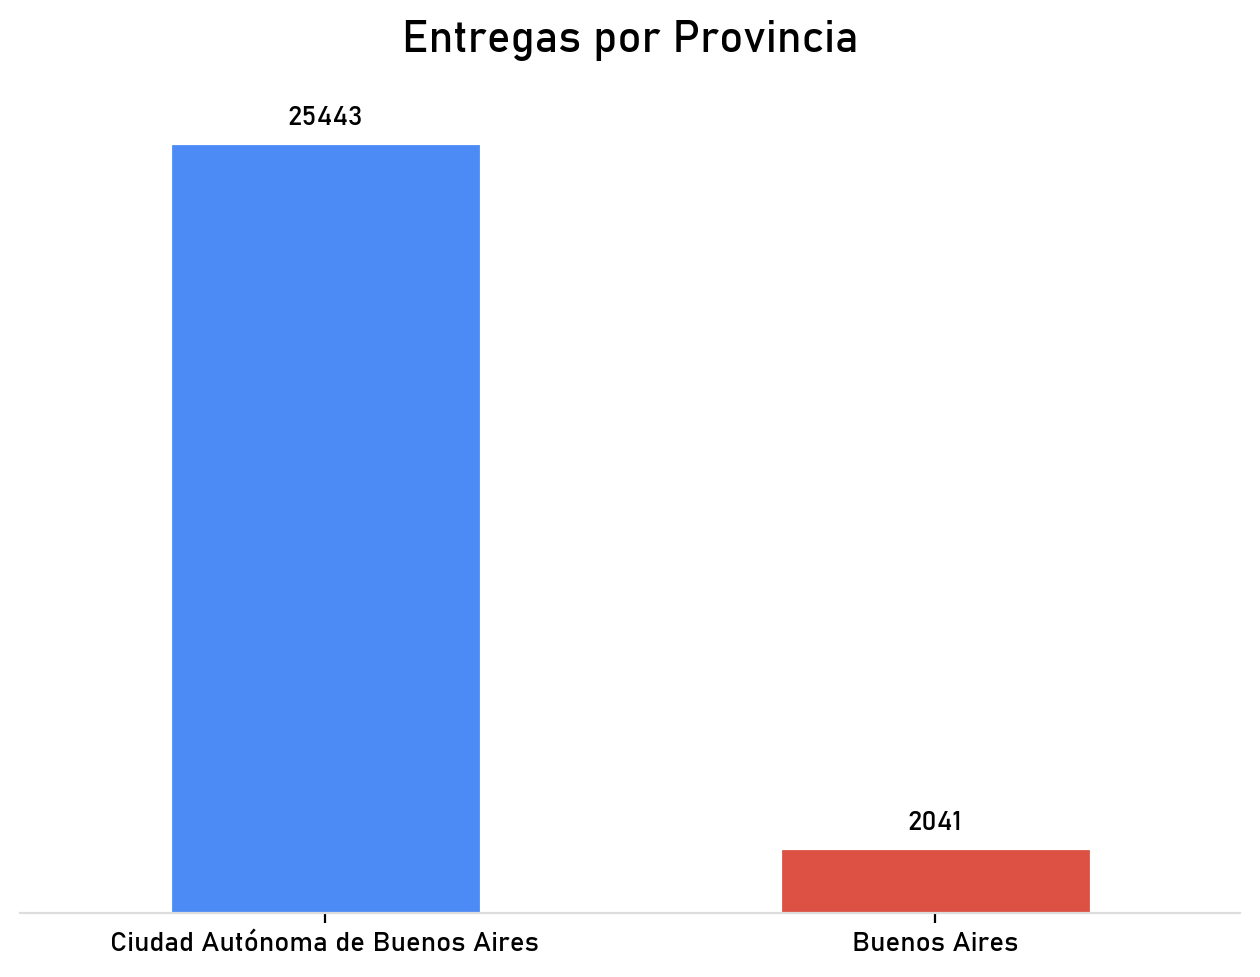

In [6]:
entregas_por_cliente = df['provincia'].value_counts().reset_index().rename(columns={'provincia':'cantidad','index':'provincia'}).sort_index()
mpl.rcParams['font.family'] = 'Bahnschrift'
# Create the bar plot
plt.figure(figsize=(6.4, 5))
ax = sns.barplot(x='provincia', y='cantidad', width=.5, data=entregas_por_cliente)

colors = ['#4C8BF5', '#DD5144']  # Colores deseados
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

# Customize appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)
plt.ylim(0, 28000)

# Add text labels on the bars
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, int(yval), ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('')
plt.title('Entregas por Provincia', fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
df_cliente_70 = df[df['cliente']==70]
df_cliente_20 = df[df['cliente']==20]

In [8]:
# mapa heatmap de cantidad de pedidos
# mapa heatmap de cantidad de pedidos cliente 20 / mapa normal de cantidad de pedidos cliente 20
# mapa heatmap de cantidad de pedidos cliente 70 / mapa normal de cantidad de pedidos cliente 70

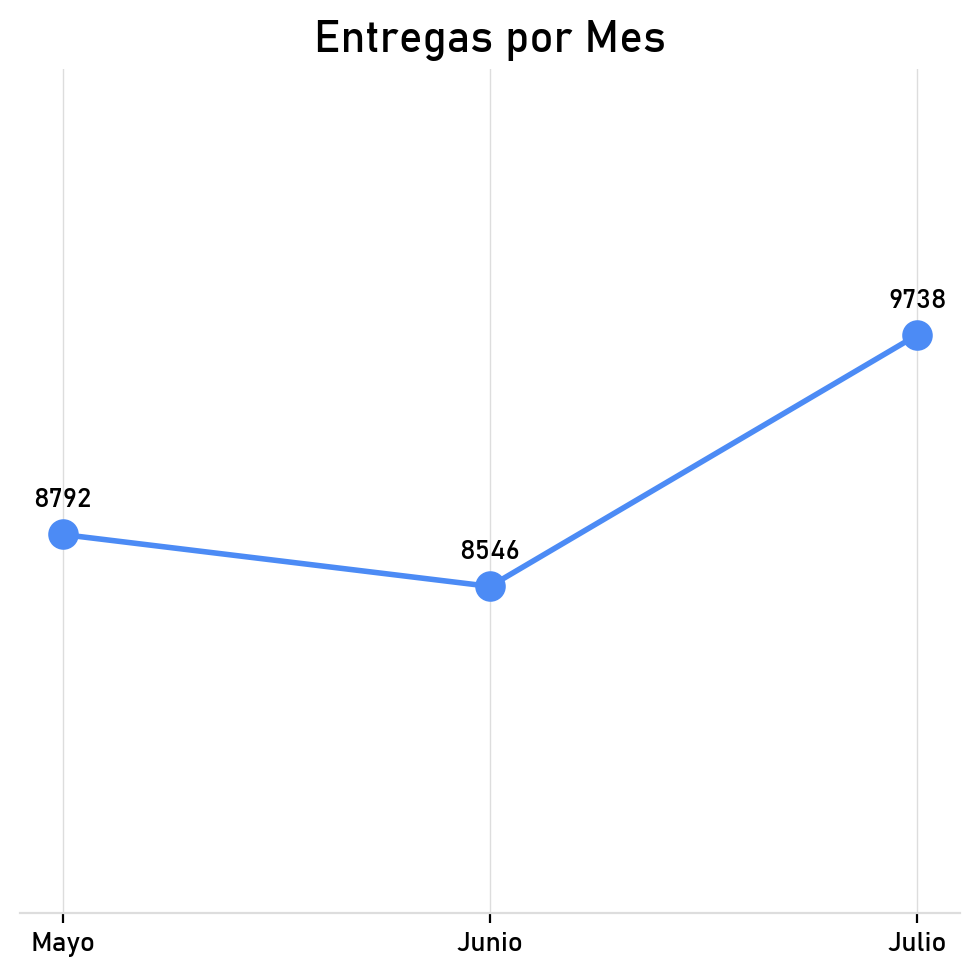

In [9]:
# Suponiendo que tienes los datos ya definidos como en tu código original
meses_orden = ['Mayo', 'Junio', 'Julio']
cantidad_pedidos = df['mes'].value_counts().reindex(meses_orden).values

# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de línea
plt.figure(figsize=(5, 5))
plt.plot(meses_orden, cantidad_pedidos, marker='o', linestyle='-', color='#4C8BF5', linewidth=2, markersize=10)  # Aumentar grosor de línea y tamaño de marcadores

# Personalizar la apariencia
ax = plt.gca()  # Obtener el eje actual
ax.spines['top'].set_visible(False)  # Ocultar la espina superior
ax.spines['right'].set_visible(False)  # Ocultar la espina derecha
ax.spines['left'].set_visible(False)  # Ocultar la espina izquierda
ax.spines['bottom'].set_color('#DDDDDD')  # Cambiar el color de la espina inferior
ax.yaxis.set_visible(False)  # Ocultar el eje y
plt.ylim(7000, 11000)  # Ajustar límites del eje y

# Agregar títulos y etiquetas
plt.title('Entregas por Mes', fontsize=16, fontweight='bold')  # Aumentar el tamaño y hacer negrita
plt.xlabel('', fontsize=12)

# Mostrar el gráfico
plt.grid(color='#DDDDDD', linestyle='-', linewidth=0.5, which='both', axis='x')  # Mostrar cuadrícula solo en el eje x

# Agregar etiquetas en los puntos de datos
for x, y in zip(meses_orden, cantidad_pedidos):
    plt.text(x, y + 100, int(y), ha='center', va='bottom', fontsize=10)  # Ajustar el posicionamiento de las etiquetas

# Ajustar el diseño
plt.tight_layout()  
plt.show()


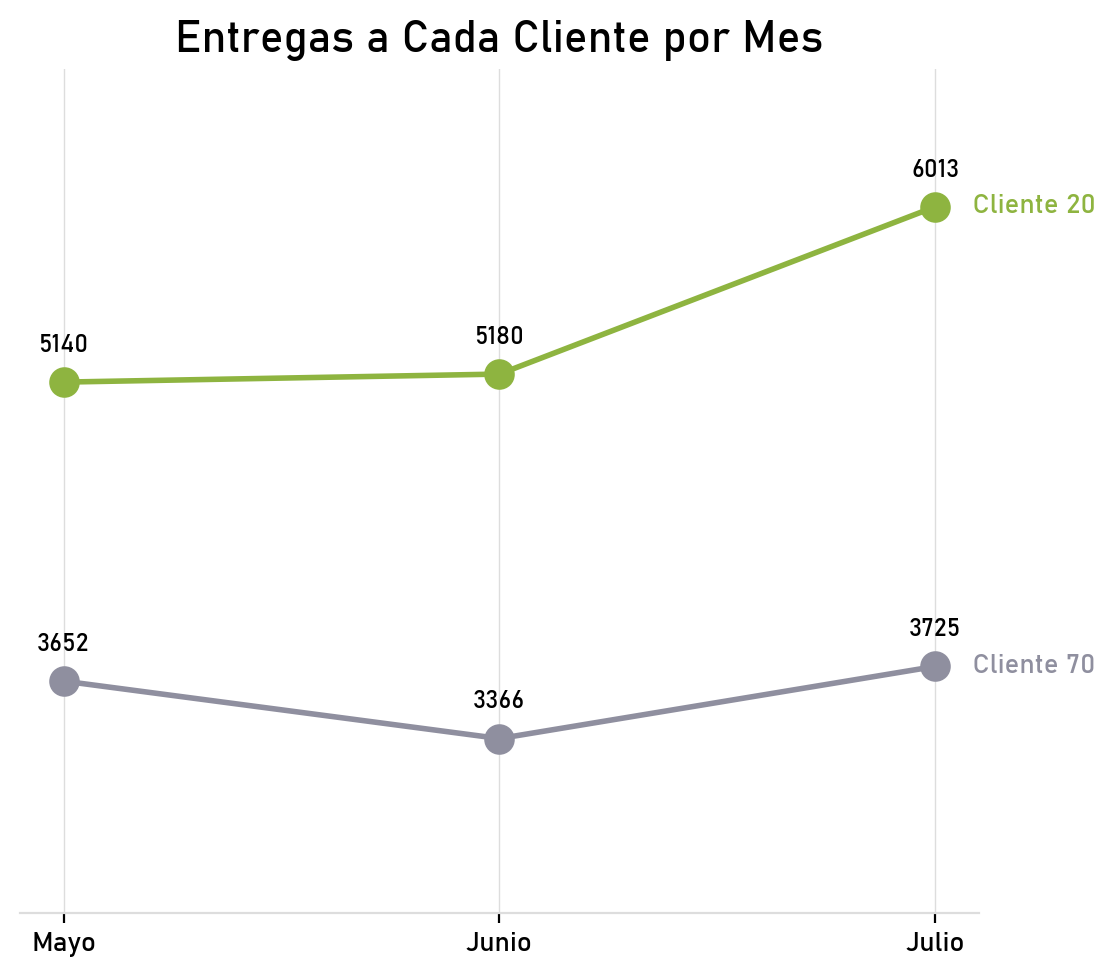

In [34]:
# Obtener el DataFrame con la cantidad de clientes por mes
clientes_por_mes = df.groupby('mes')['cliente'].value_counts().unstack().reindex(meses_orden)
clientes_por_mes.index
# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Definir los colores para los clientes
colors = ['#8eb440', '#8f8f9f']

# Crear el gráfico de líneas
plt.figure(figsize=(5.7, 5))
for i, cliente in enumerate(clientes_por_mes.columns):
    plt.plot(clientes_por_mes.index, clientes_por_mes[cliente], marker='o', label=cliente,
             linewidth=2, markersize=10, color=colors[i])  # Asignar color específico

    # Agregar texto al final de la línea con desplazamiento a la derecha
    plt.text(clientes_por_mes.index[-1], clientes_por_mes[cliente].iloc[-1],
             f'     Cliente {cliente}', ha='left', va='center', fontsize=10, color=colors[i])  # Ajustar la posición

    # Agregar valores en cada punto de la línea
    for mes, valor in zip(clientes_por_mes.index, clientes_por_mes[cliente]):
        plt.text(mes, valor + 150, valor, ha='center', fontsize=9, color='black')  # Ajustar la posición

# Personalizar la apariencia
ax = plt.gca()  # Obtener el eje actual
ax.spines['top'].set_visible(False)  # Ocultar la espina superior
ax.spines['right'].set_visible(False)  # Ocultar la espina derecha
ax.spines['left'].set_visible(False)  # Ocultar la espina izquierda
ax.spines['bottom'].set_color('#DDDDDD')  # Cambiar el color de la espina inferior
ax.yaxis.set_visible(False)  # Ocultar el eje y
plt.ylim(2500, 6700)  # Ajustar límites del eje y

# Agregar títulos y etiquetas
plt.title('Entregas a Cada Cliente por Mes', fontsize=16, fontweight='bold')  # Aumentar tamaño y hacer negrita
plt.xlabel('', fontsize=12)

# Configurar el gráfico
plt.grid(color='#DDDDDD', linestyle='-', linewidth=0.5, which='both', axis='x')  # Mostrar cuadrícula solo en el eje x

# Ajustar el diseño
plt.tight_layout()
plt.show()


In [11]:
# Supongamos que df ya está definido y contiene las columnas 'VisitaFecha' y 'cliente'
asd = df[['VisitaFecha', 'cliente']].value_counts().to_frame().reset_index().sort_values(by='VisitaFecha')[:-3].sort_values(by=['cliente', 'VisitaFecha']).reset_index(drop=True).rename(columns={0:'cantidad'})
asd['VisitaFecha'] = pd.to_datetime(asd['VisitaFecha'])

# Contar clientes únicos por fecha
cliente_counts = asd.groupby('VisitaFecha')['cliente'].nunique().reset_index()

# Filtrar fechas con solo un cliente
fechas_un_cliente = cliente_counts[cliente_counts['cliente'] == 1]['VisitaFecha']

# Identificar clientes únicos
clientes = asd['cliente'].unique()

# Crear un nuevo DataFrame para las filas con cantidad 0
nuevas_filas = []

for fecha in fechas_un_cliente:
    # Obtener el cliente que falta en esa fecha
    clientes_en_fecha = asd[asd['VisitaFecha'] == fecha]['cliente'].unique()
    cliente_faltante = [cliente for cliente in clientes if cliente not in clientes_en_fecha]

    # Crear una nueva fila con cantidad 0 para el cliente faltante
    for cliente in cliente_faltante:
        nuevas_filas.append({'VisitaFecha': fecha, 'cliente': cliente, 'cantidad': 0})

# Convertir a DataFrame
nuevas_filas_df = pd.DataFrame(nuevas_filas)

# Concatenar el DataFrame original con las nuevas filas
asd = pd.concat([asd, nuevas_filas_df], ignore_index=True)

# Ordenar el DataFrame por fecha y cliente
asd = asd.sort_values(by=['VisitaFecha', 'cliente']).reset_index(drop=True)

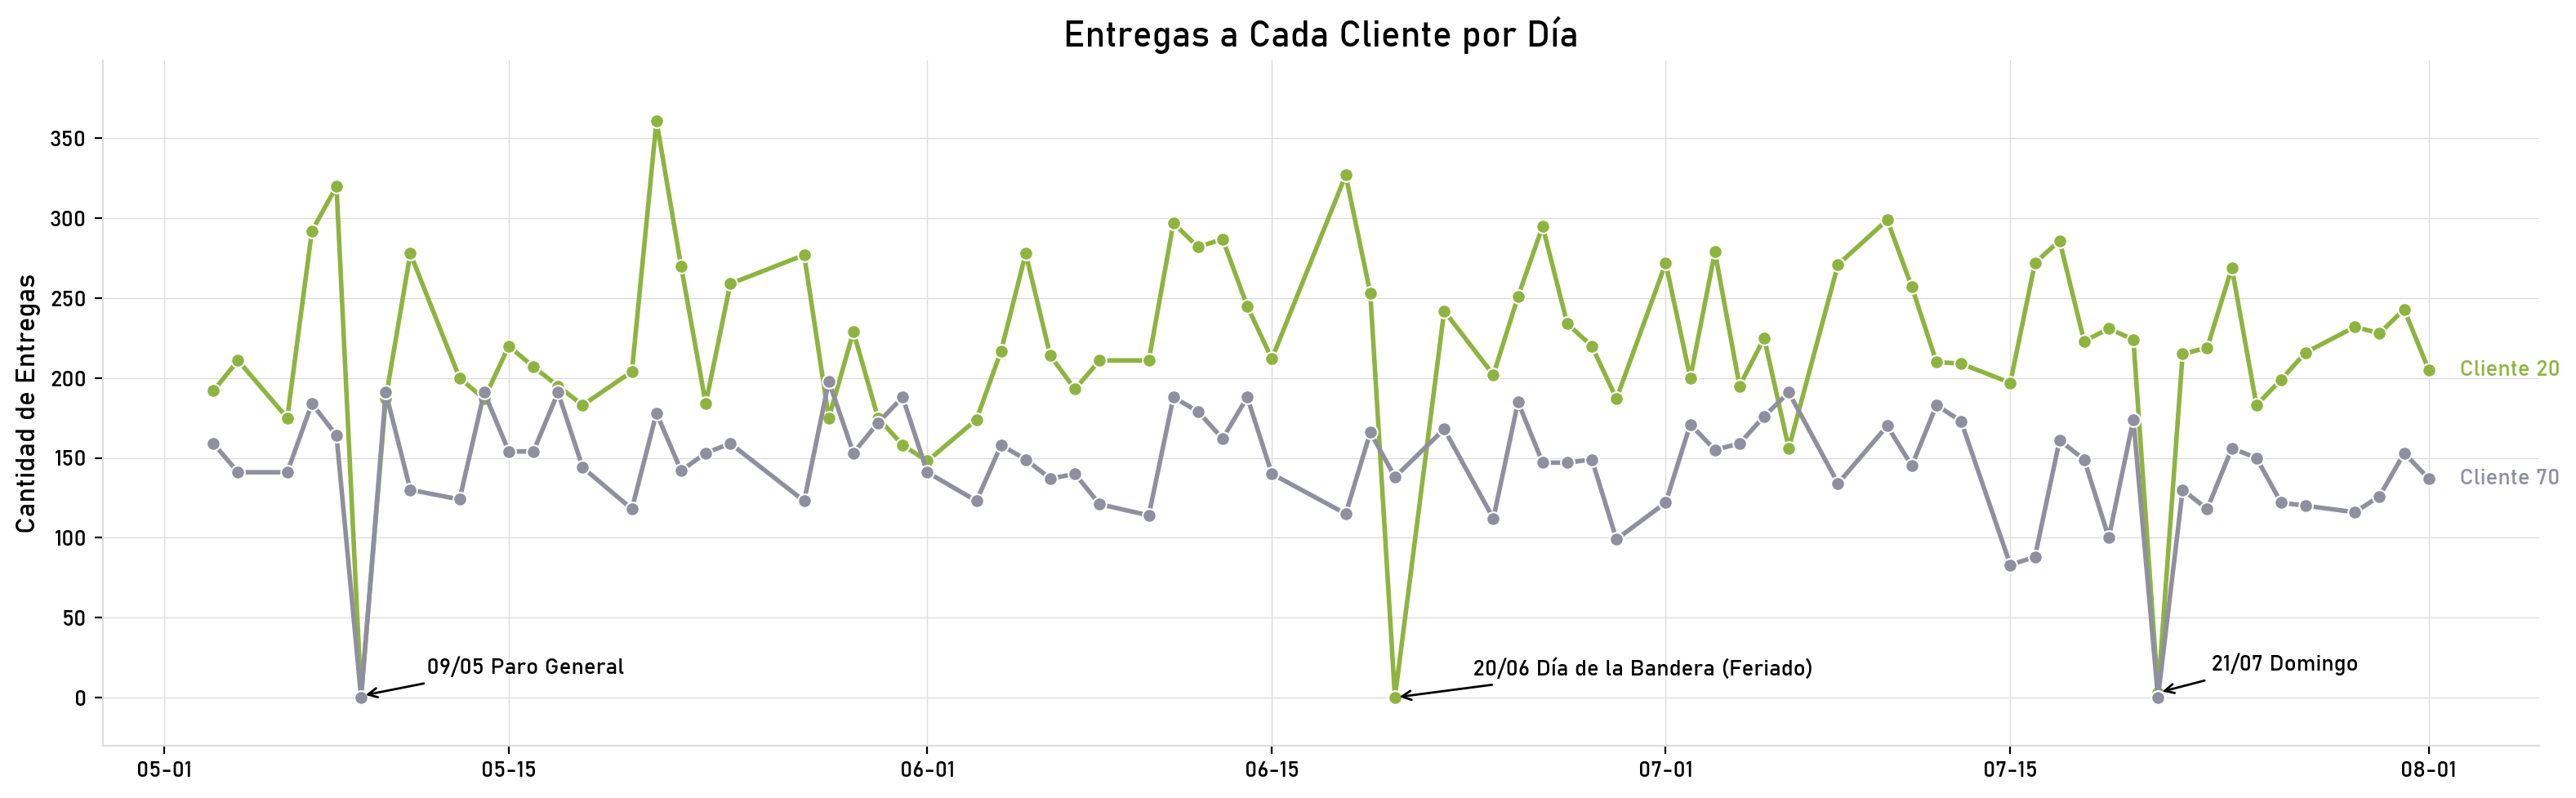

In [12]:
# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Definir los colores para los clientes
colors = ['#8eb440', '#8f8f9f']  # Asegúrate de que coincidan con los clientes de tu DataFrame

# Crear el gráfico de líneas
plt.figure(figsize=(16, 5))

# Graficar cada cliente por separado
for i, cliente in enumerate(asd['cliente'].unique()):
    sns.lineplot(
        x='VisitaFecha',
        y='cantidad',
        data=asd[asd['cliente'] == cliente],
        marker='o',
        label=cliente,
        color=colors[i],
        linewidth=2,
        markersize=6,
        legend=False
    )

    # Agregar texto al final de la línea con desplazamiento a la derecha
    plt.text(
        asd['VisitaFecha'].max(), 
        asd[asd['cliente'] == cliente]['cantidad'].iloc[-1],
        f'     Cliente {cliente}', 
        ha='left', 
        va='center', 
        fontsize=10, 
        color=colors[i]
    )

# Personalizar la apariencia
ax = plt.gca()  # Obtener el eje actual
ax.spines['top'].set_visible(False)  # Ocultar la espina superior
ax.spines['right'].set_visible(False)  # Ocultar la espina derecha
ax.spines['left'].set_color('#DDDDDD')  # Ocultar la espina izquierda
ax.spines['bottom'].set_color('#DDDDDD')  # Cambiar el color de la espina inferior
ax.yaxis.set_visible(True)  # Mostrar el eje y (ajustar según sea necesario)
plt.ylim(0, asd['cantidad'].max() + 5)  # Ajustar límites del eje y

comentarios = {
    '2024-05-09': '       09/05 Paro General',
    '2024-06-20': '         20/06 Día de la Bandera (Feriado)',
    '2024-07-21': '     21/07 Domingo',
}

for fecha, comentario in comentarios.items():
    plt.annotate(
        comentario,
        xy=(pd.to_datetime(fecha), asd.loc[asd['VisitaFecha'] == pd.to_datetime(fecha), 'cantidad'].values[0]),
        xytext=(10, 10),  # Desplazamiento del texto
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', color='black', lw=1),  # Flecha
        fontsize=10,
        color='black'
    )

# Agregar títulos y etiquetas
plt.title('Entregas a Cada Cliente por Día', fontsize=16, fontweight='bold')  # Aumentar tamaño y hacer negrita
plt.ylabel('Cantidad de Entregas', fontsize=12)
plt.xlabel('', fontsize=12)

# Configurar el gráfico
plt.grid(color='#DDDDDD', linestyle='-', linewidth=0.5, which='both')  # Mostrar cuadrícula solo en el eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ylim(-30,399)
# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


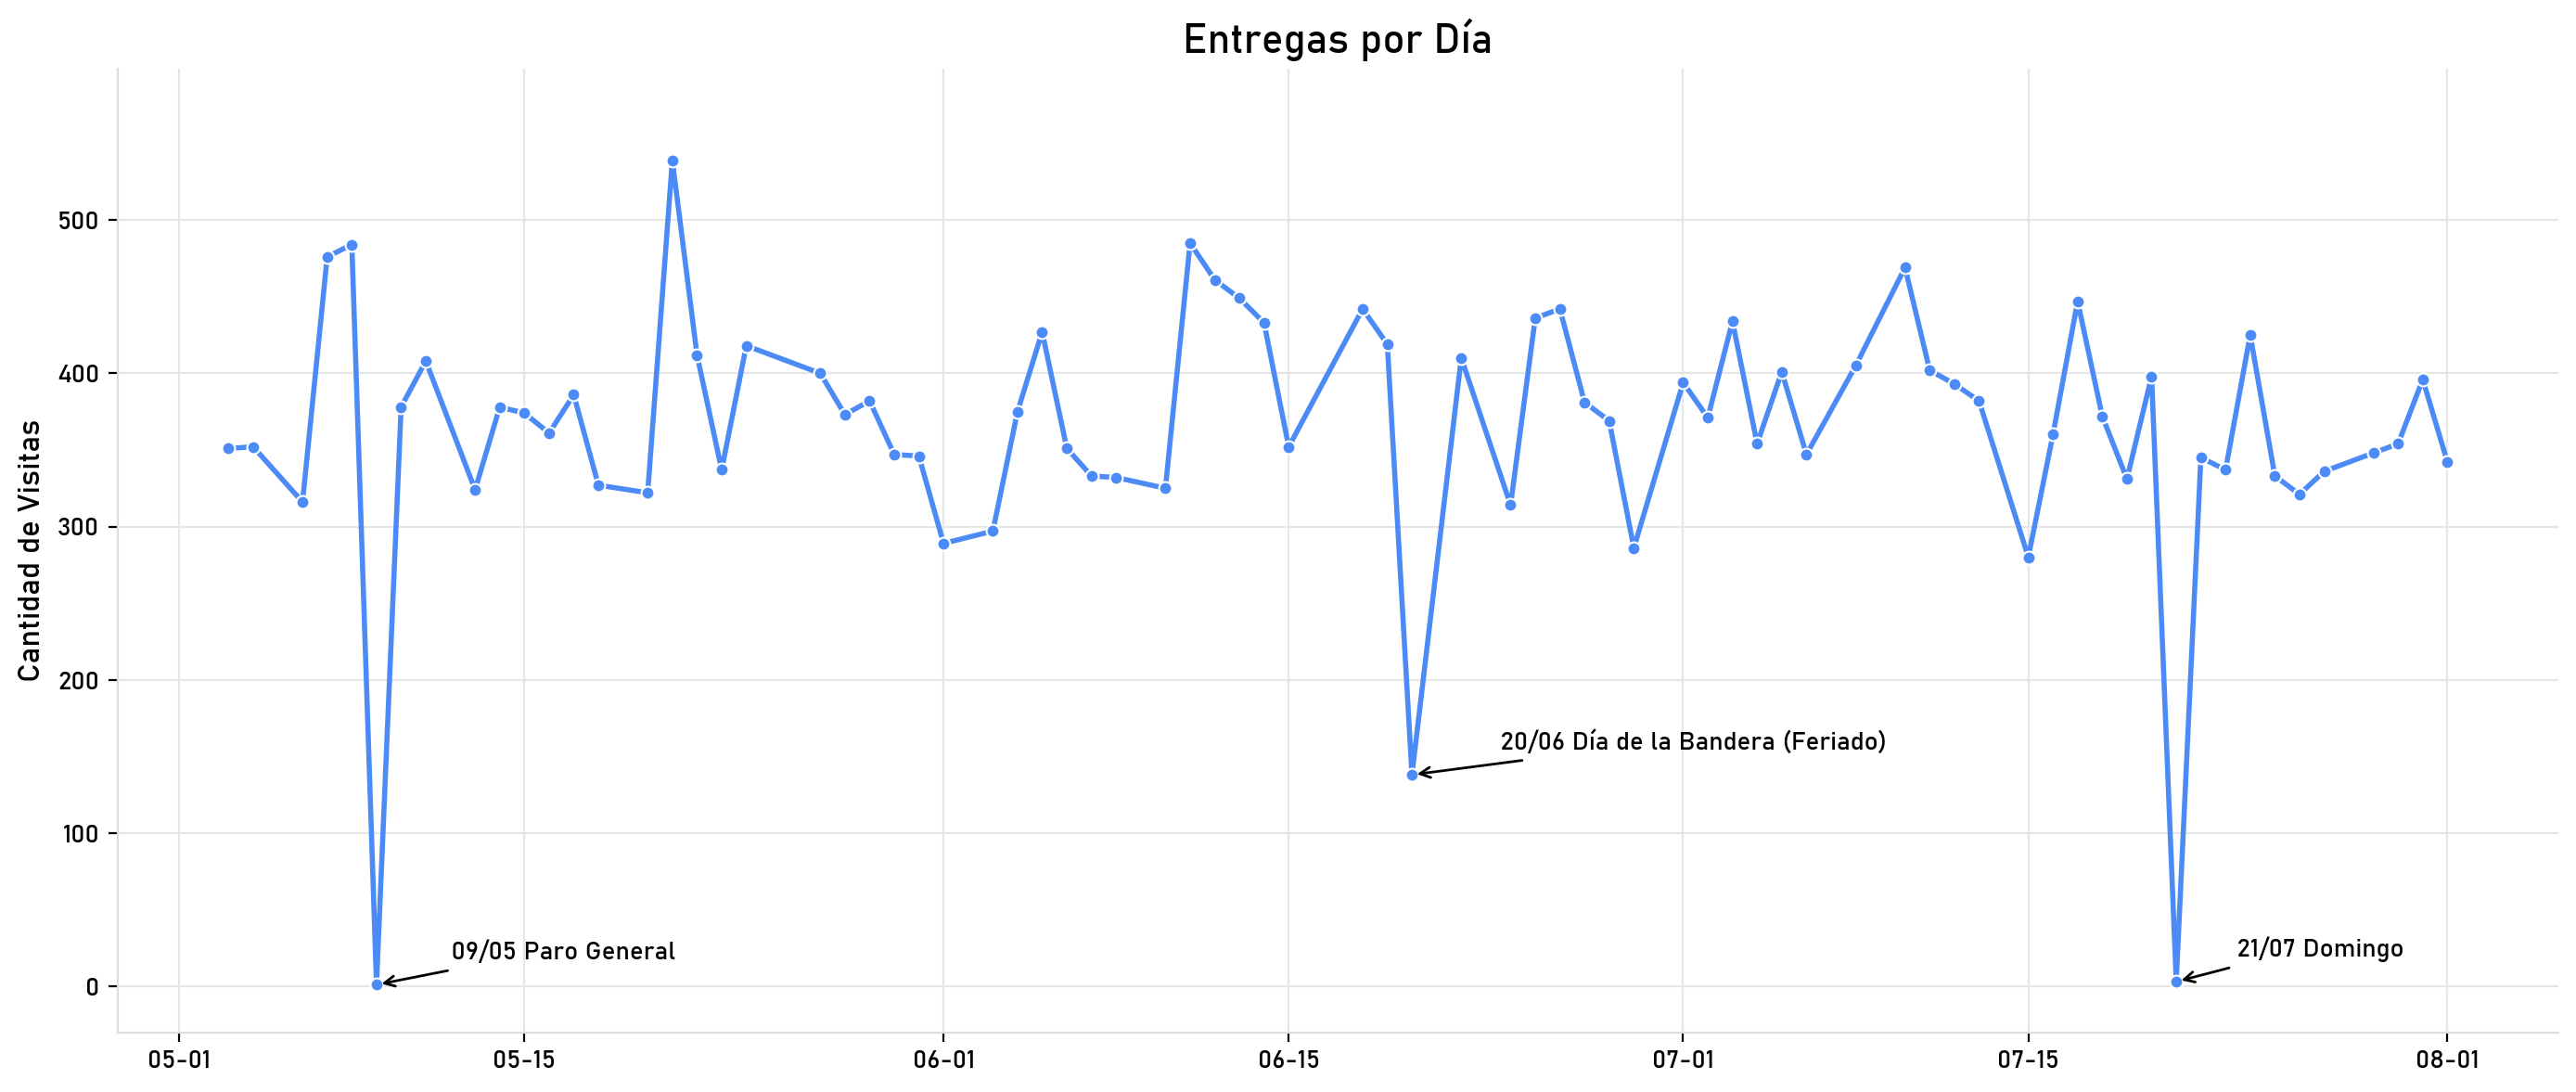

In [13]:
asd = df['VisitaFecha'].value_counts().to_frame().reset_index().sort_values(by='index').reset_index(drop=True)
asd = asd.rename(columns={'index':'fecha'})[:-3]
asd['fecha'] = pd.to_datetime(asd['fecha'])

# Crear el gráfico de líneas
plt.figure(figsize=(14, 6))

# Ajustar el estilo de la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Ploteo de las líneas
sns.lineplot(x='fecha', y='VisitaFecha', data=asd, marker='o', color='#4C8BF5', linewidth=2, markersize=5)

# Personalizar los bordes del gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#DDDDDD')
plt.gca().spines['bottom'].set_color('#DDDDDD')

# Agregar comentarios en fechas específicas
comentarios = {
    '2024-05-09': '       09/05 Paro General',
    '2024-06-20': '         20/06 Día de la Bandera (Feriado)',
    '2024-07-21': '     21/07 Domingo',
}

for fecha, comentario in comentarios.items():
    plt.annotate(
        comentario,
        xy=(pd.to_datetime(fecha), asd.loc[asd['fecha'] == pd.to_datetime(fecha), 'VisitaFecha'].values[0]),
        xytext=(10, 10),  # Desplazamiento del texto
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', color='black', lw=1),  # Flecha
        fontsize=10,
        color='black'
    )

# Configuración del gráfico
plt.title('Entregas por Día', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('Cantidad de Visitas', fontsize=12)
plt.ylim(-30, 599)  # Ajustar límites del eje y
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# Mostrar la cuadrícula
plt.grid(True, color='#E6E6E6')

# Mostrar el gráfico
plt.tight_layout()  # Asegura que todo se ajuste bien en la figura
plt.show()


<hr></hr>

# DÍAS DE LA SEMANA Y DEMORAS

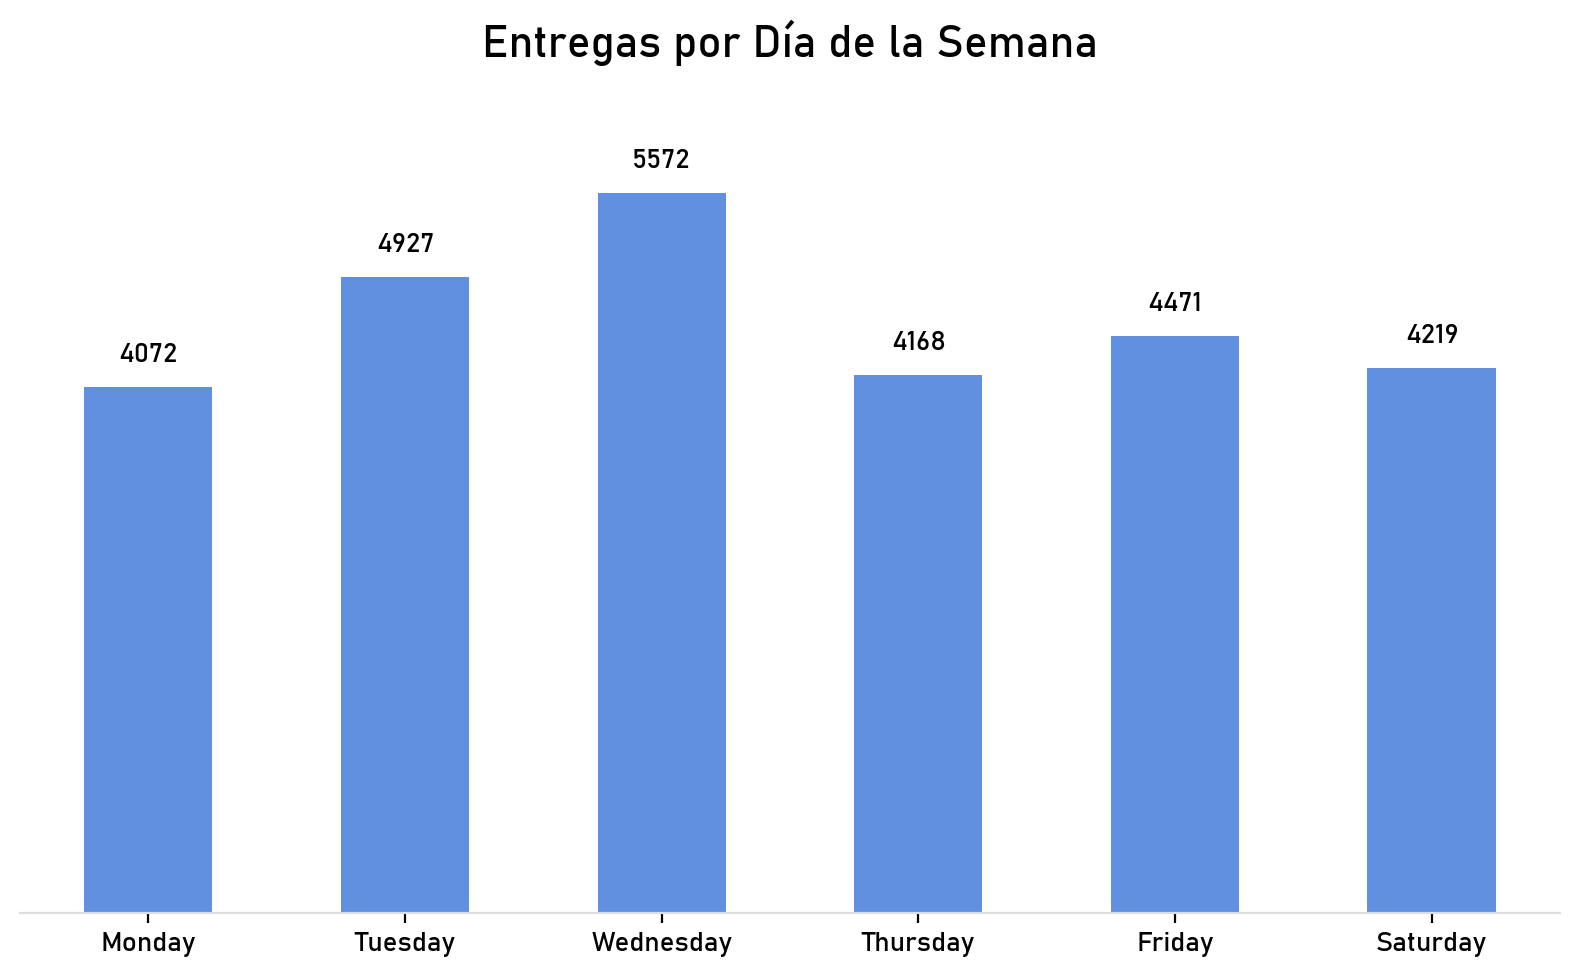

In [14]:
# Supongamos que df ya está definido y contiene la columna 'VisitaDia'
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cantidad_pedidos_por_dia = df['VisitaDia'].value_counts().reindex(dias_semana).reset_index()
cantidad_pedidos_por_dia.columns = ['Día de la semana', 'Cantidad']

# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Día de la semana', y='Cantidad', width=.5, data=cantidad_pedidos_por_dia, color='#4C8BF5')

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)  # Mostrar el eje y
plt.ylim(0, 6500)  # Ajustar el límite superior del eje y

# Agregar etiquetas de texto sobre las barras
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 150, int(yval), ha='center', va='bottom', fontsize=10)

# Agregar título y etiquetas
plt.title('Entregas por Día de la Semana', fontsize=16, fontweight='bold')  # Aumentar tamaño y hacer negrita
plt.xlabel('')  # Sin etiqueta para el eje x

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [15]:
cantidad_pedidos_por_dia = df[['VisitaDia','cliente']].value_counts().reset_index().rename(columns={0:'cantidad'}).drop([12])
mapeo = {20:'Cliente 20', 70: 'Cliente 70'}
cantidad_pedidos_por_dia = cantidad_pedidos_por_dia.replace(mapeo)
cantidad_pedidos_por_dia = cantidad_pedidos_por_dia.reindex([2,1,0,5,3,4,11,8,6,9,7,10])

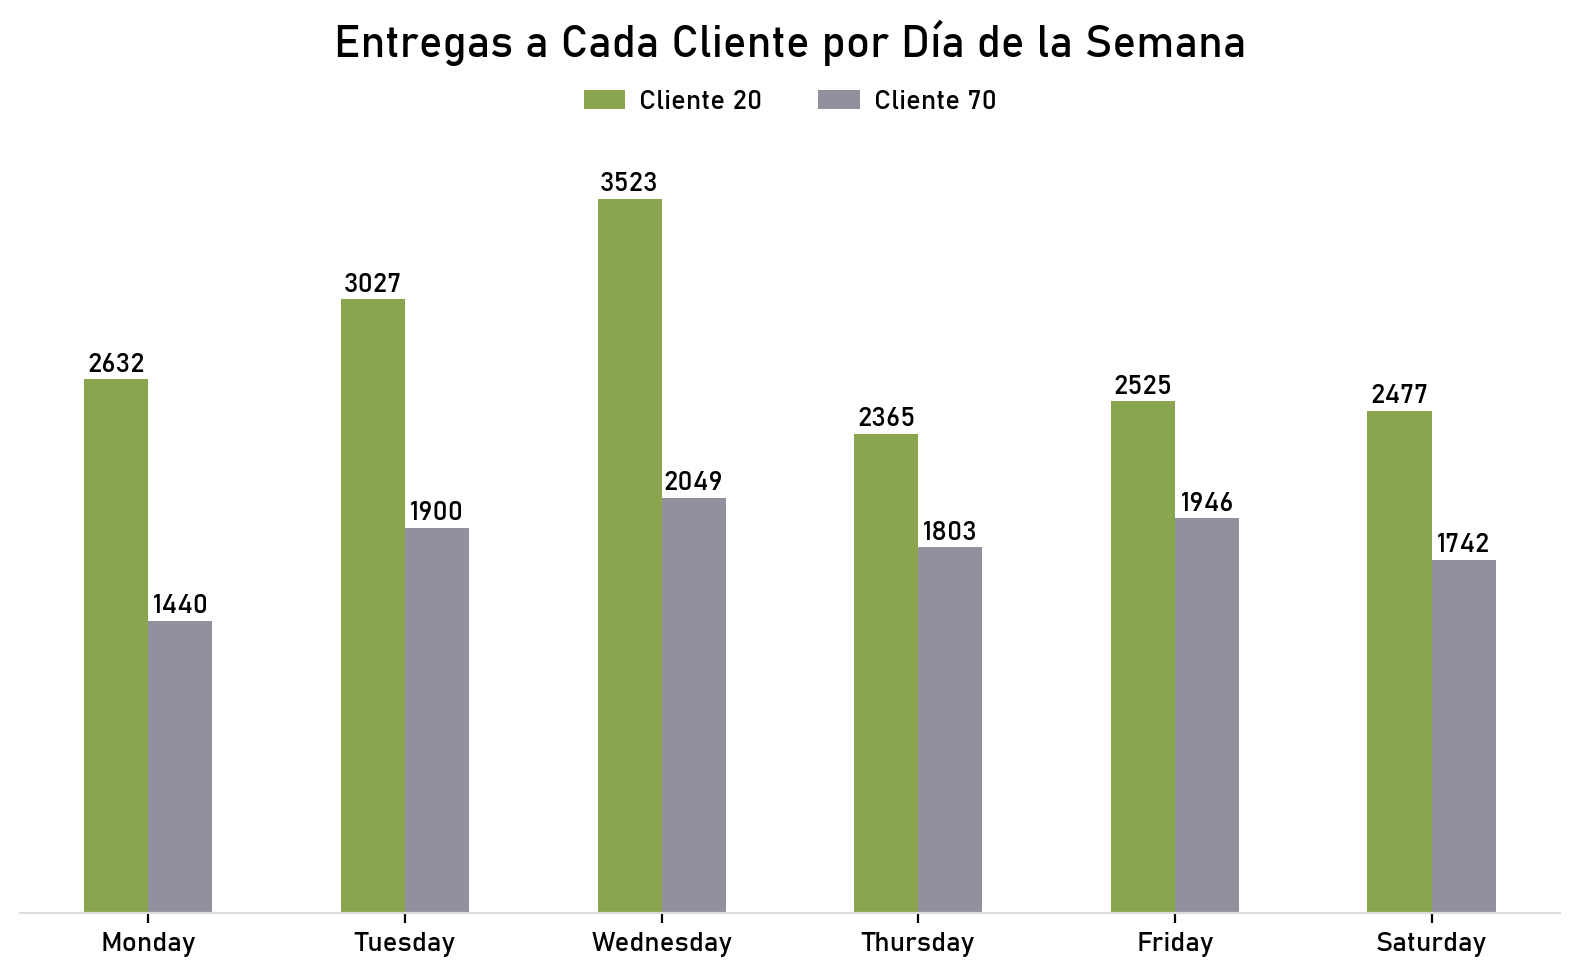

In [16]:
# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
palette = {'Cliente 20': '#8eb440', 'Cliente 70': '#8f8f9f'}  # Usa las etiquetas correctas de los clientes
ax = sns.barplot(x='VisitaDia', y='cantidad', hue='cliente', width=.5, data=cantidad_pedidos_por_dia, palette=palette)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)  # Mostrar el eje y
plt.ylim(0, 3950)  # Ajustar el límite superior del eje y

# Agregar etiquetas de texto sobre las barras
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10)

# Agregar título y etiquetas
plt.title('Entregas a Cada Cliente por Día de la Semana', fontsize=16, fontweight='bold', pad=20)  # Aumentar tamaño y hacer negrita
plt.xlabel('')  # Sin etiqueta para el eje x

# Configurar la leyenda
legend_labels = ['Cliente 20', 'Cliente 70']
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.06), fontsize=10, frameon=False, ncol=2, handlelength=1.5, 
          handletextpad=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [17]:
df['FinVisitaReal']    = pd.to_datetime(df['FinVisitaReal'])
df['InicioVisitaReal'] = pd.to_datetime(df['InicioVisitaReal'])
df['Demora_Inicio_Fin'] = round((df['FinVisitaReal'] - df['InicioVisitaReal']).dt.seconds.div(60),2)

In [18]:
df['VisitaHora_Inicio_UNICO'] = df['InicioVisitaReal'].dt.hour
count_horas = df['VisitaHora_Inicio_UNICO'].value_counts().reset_index()
count_horas = count_horas.sort_values(by='index')

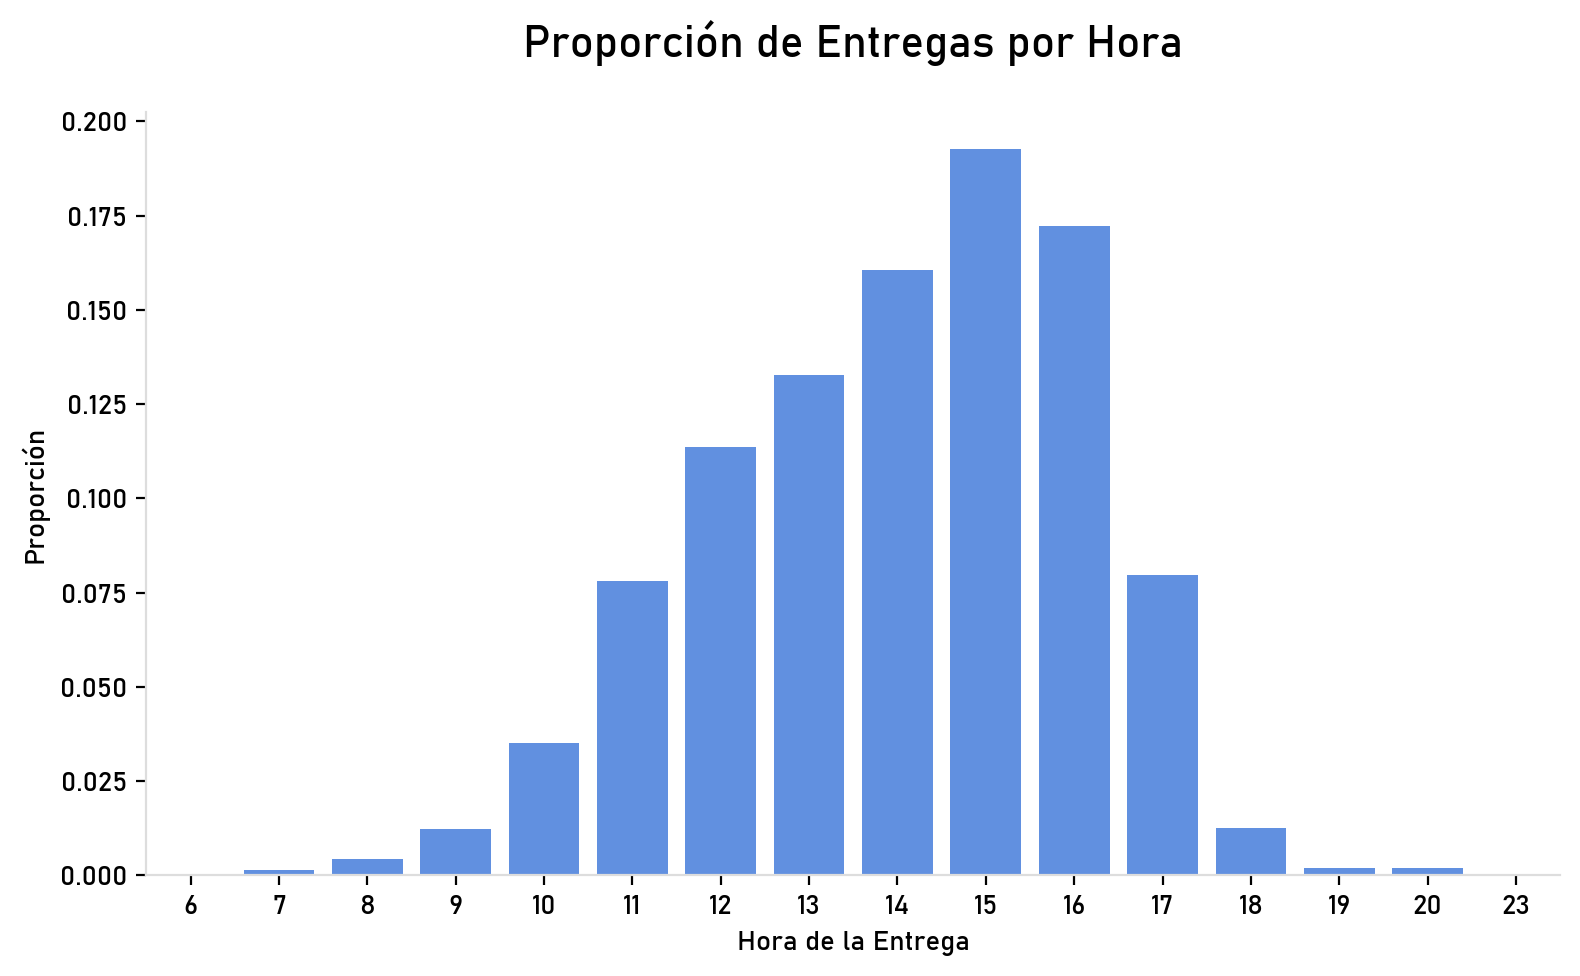

In [19]:
# Supongamos que merged_df_1 ya está definido y contiene las columnas necesarias
count_horas['Count'] = count_horas['VisitaHora_Inicio_UNICO'].div(count_horas['VisitaHora_Inicio_UNICO'].sum())
count_horas['index'] = count_horas['index'].astype(int)

# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='index', y='Count', data=count_horas, color='#4C8BF5', width=.8)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(True)  # Mostrar el eje y

# Agregar título y etiquetas
plt.title('Proporción de Entregas por Hora', fontsize=16, fontweight='bold', pad=20)  # Aumentar tamaño y hacer negrita
plt.xlabel('Hora de la Entrega')  # Etiqueta para el eje x
plt.ylabel('Proporción')  # Etiqueta para el eje x

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_2432\1209113085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliente_20['VisitaHora_Inicio_UNICO'] = pd.to_datetime(df_cliente_20['InicioVisitaReal']).dt.hour


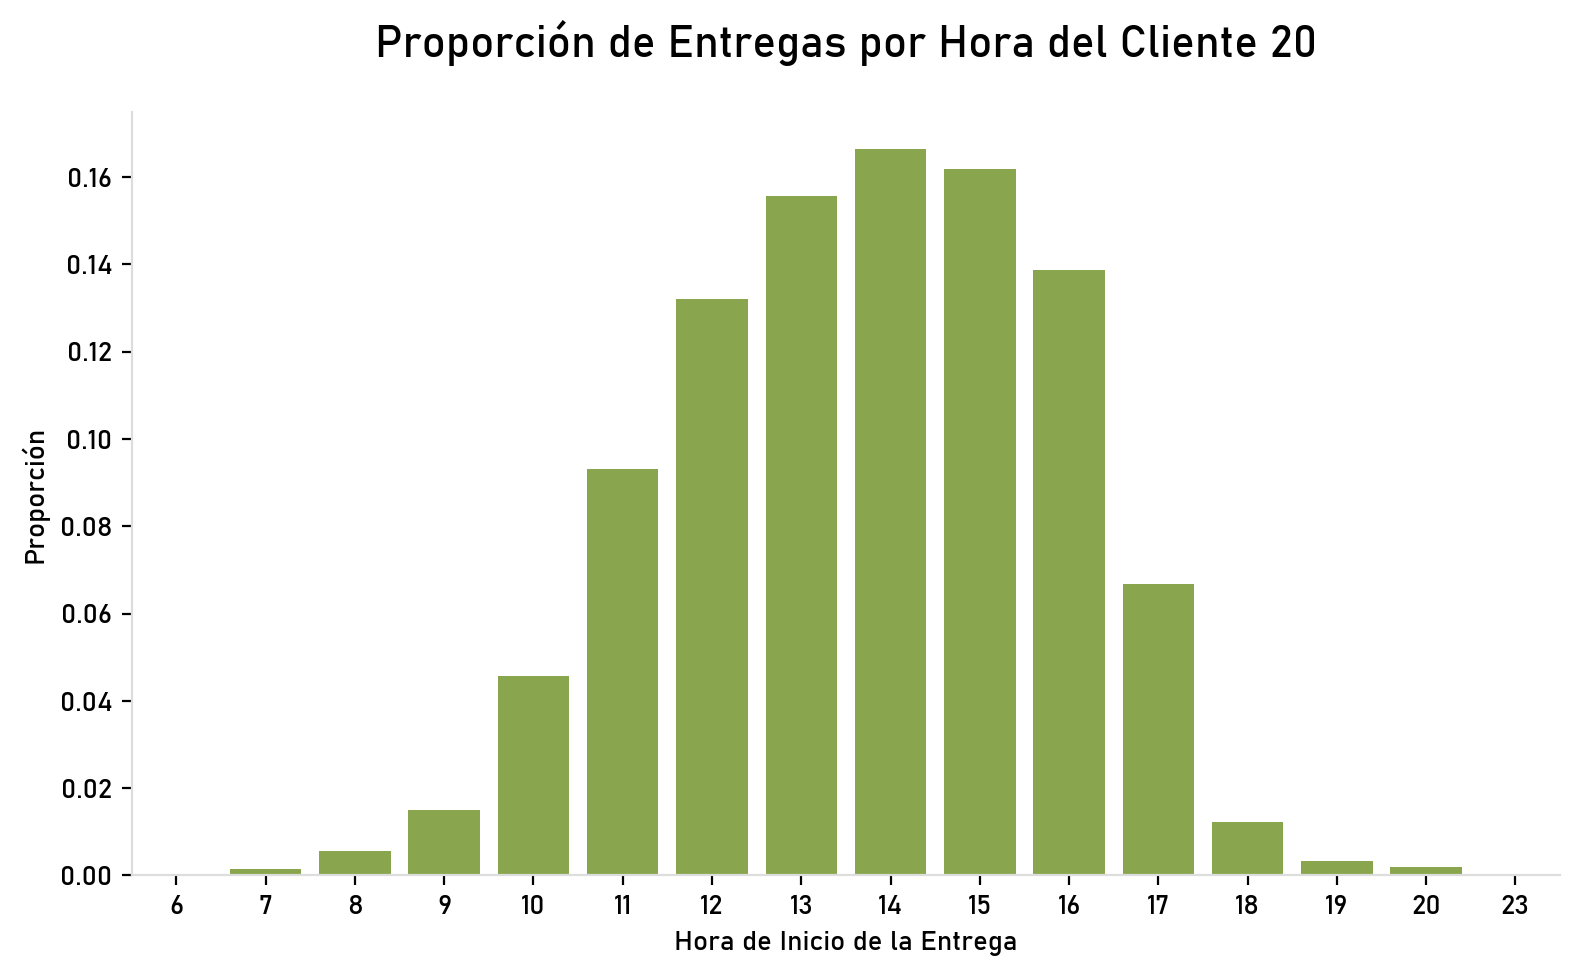

In [20]:
df_cliente_20['VisitaHora_Inicio_UNICO'] = pd.to_datetime(df_cliente_20['InicioVisitaReal']).dt.hour
count_horas = df_cliente_20['VisitaHora_Inicio_UNICO'].value_counts().reset_index()
count_horas = count_horas.sort_values(by='index')
count_horas['Count'] = count_horas['VisitaHora_Inicio_UNICO'].div(count_horas['VisitaHora_Inicio_UNICO'].sum())
count_horas['index'] = count_horas['index'].astype(int)
count_horas
# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='index', y='Count', data=count_horas, color='#8eb440', width=.8)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(True)  # Mostrar el eje y

# Agregar título y etiquetas
plt.title('Proporción de Entregas por Hora del Cliente 20', fontsize=16, fontweight='bold', pad=20)  # Aumentar tamaño y hacer negrita
plt.xlabel('Hora de Inicio de la Entrega')  # Etiqueta para el eje x
plt.ylabel('Proporción')  # Etiqueta para el eje x

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_2432\4153660449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliente_70['VisitaHora_Inicio_UNICO'] = pd.to_datetime(df_cliente_70['InicioVisitaReal']).dt.hour


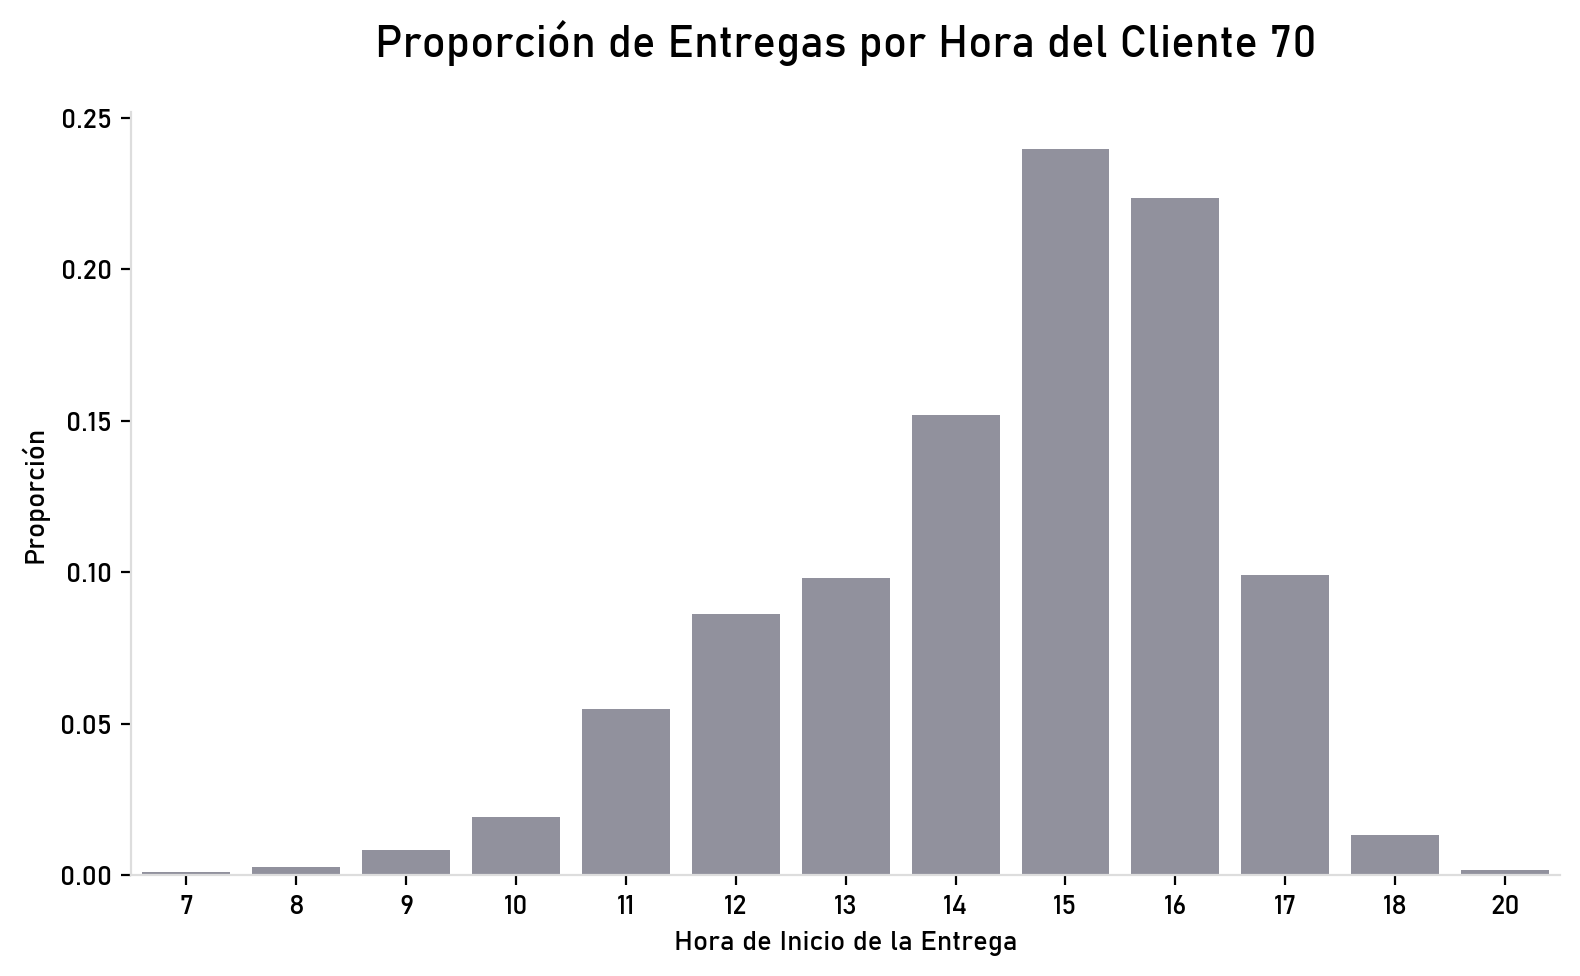

In [21]:
df_cliente_70['VisitaHora_Inicio_UNICO'] = pd.to_datetime(df_cliente_70['InicioVisitaReal']).dt.hour
count_horas = df_cliente_70['VisitaHora_Inicio_UNICO'].value_counts().reset_index()
count_horas = count_horas.sort_values(by='index')
count_horas['Count'] = count_horas['VisitaHora_Inicio_UNICO'].div(count_horas['VisitaHora_Inicio_UNICO'].sum())
count_horas['index'] = count_horas['index'].astype(int)
count_horas
# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='index', y='Count', data=count_horas, color='#8f8f9f', width=.8)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(True)  # Mostrar el eje y

# Agregar título y etiquetas
plt.title('Proporción de Entregas por Hora del Cliente 70', fontsize=16, fontweight='bold', pad=20)  # Aumentar tamaño y hacer negrita
plt.xlabel('Hora de Inicio de la Entrega')  # Etiqueta para el eje x
plt.ylabel('Proporción')  # Etiqueta para el eje x

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\Marcos\AppData\Local\Temp\ipykernel_2432\1122028991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliente_20['VisitaHora_Inicio_UNICO'] = pd.to_datetime(df_cliente_20['InicioVisitaReal']).dt.hour
C:\Users\Marcos\AppData\Local\Temp\ipykernel_2432\1122028991.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cliente_70['VisitaHora_Inicio_UNICO'] = pd.to_datetime(df_cliente_70['InicioVisitaReal']).dt.hour


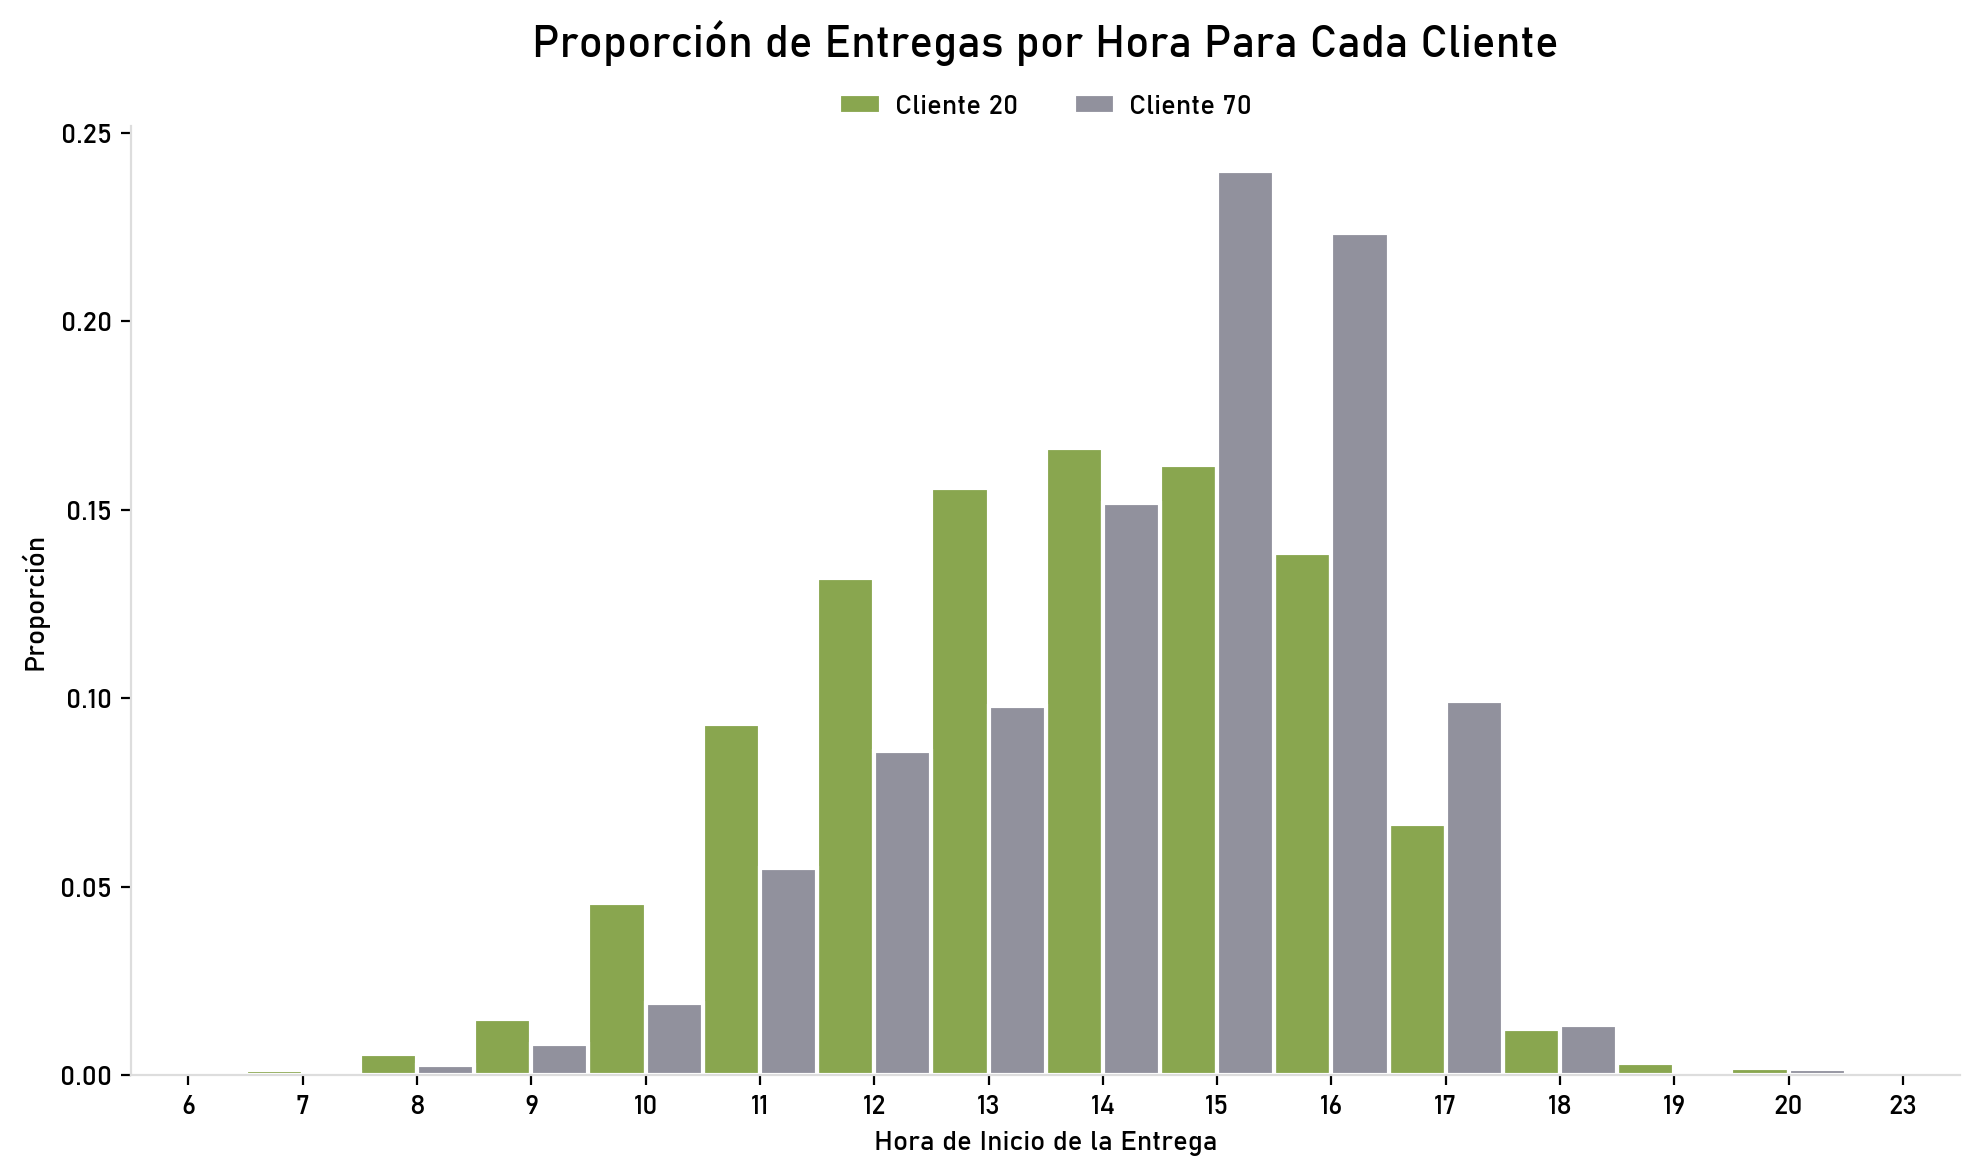

In [22]:
# Supongamos que df_cliente_20 y df_cliente_70 ya están definidos y contienen las columnas necesarias
# Procesar datos para Cliente 20
df_cliente_20['VisitaHora_Inicio_UNICO'] = pd.to_datetime(df_cliente_20['InicioVisitaReal']).dt.hour
count_horas_20 = df_cliente_20['VisitaHora_Inicio_UNICO'].value_counts().reset_index()
count_horas_20 = count_horas_20.sort_values(by='index')
count_horas_20['Count'] = count_horas_20['VisitaHora_Inicio_UNICO'].div(count_horas_20['VisitaHora_Inicio_UNICO'].sum())
count_horas_20['index'] = count_horas_20['index'].astype(int)
count_horas_20['Cliente'] = 'Cliente 20'  # Agregar una columna para identificar al cliente

# Procesar datos para Cliente 70
df_cliente_70['VisitaHora_Inicio_UNICO'] = pd.to_datetime(df_cliente_70['InicioVisitaReal']).dt.hour
count_horas_70 = df_cliente_70['VisitaHora_Inicio_UNICO'].value_counts().reset_index()
count_horas_70 = count_horas_70.sort_values(by='index')
count_horas_70['Count'] = count_horas_70['VisitaHora_Inicio_UNICO'].div(count_horas_70['VisitaHora_Inicio_UNICO'].sum())
count_horas_70['index'] = count_horas_70['index'].astype(int)
count_horas_70['Cliente'] = 'Cliente 70'  # Agregar una columna para identificar al cliente

# Combinar los DataFrames
combined_counts = pd.concat([count_horas_20, count_horas_70])

# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='index', y='Count', hue='Cliente', data=combined_counts, palette={'Cliente 20': '#8eb440', 'Cliente 70': '#8f8f9f'}, width=1, edgecolor='white', linewidth=1.5)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(True)  # Mostrar el eje y

# Agregar título y etiquetas
plt.title('Proporción de Entregas por Hora Para Cada Cliente', fontsize=16, fontweight='bold', pad=25)  # Aumentar tamaño y hacer negrita
plt.xlabel('Hora de Inicio de la Entrega')  # Etiqueta para el eje x
plt.ylabel('Proporción')  # Etiqueta para el eje y

# Configurar la leyenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.06), fontsize=10, frameon=False, ncol=2, handlelength=1.5, 
          handletextpad=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


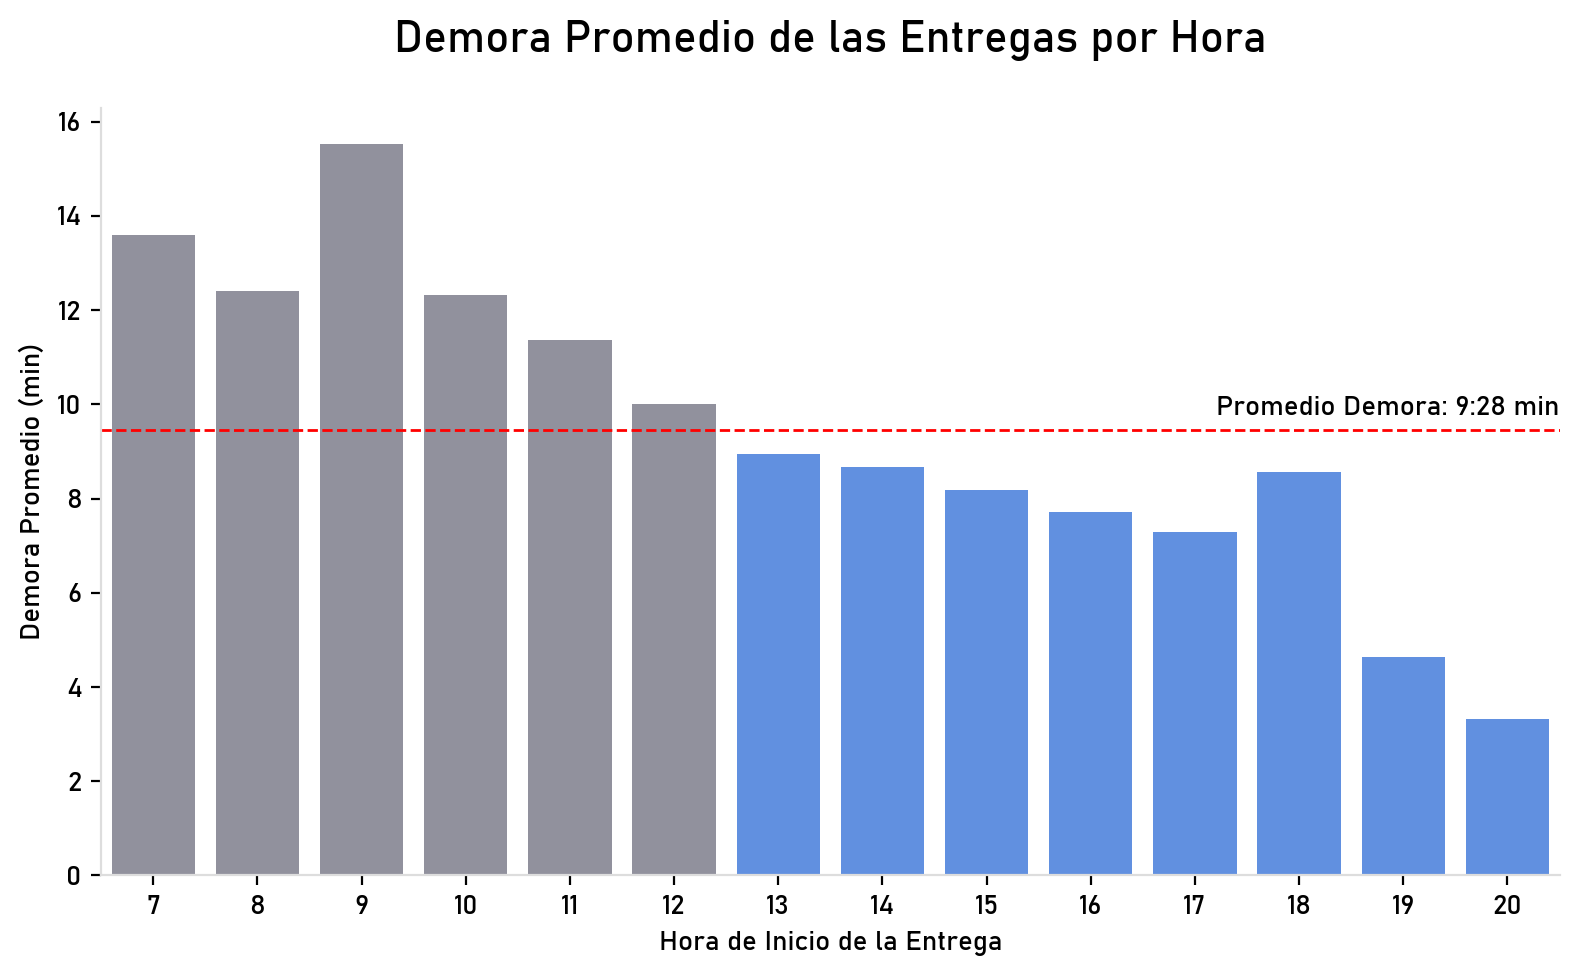

In [23]:
df_con_demora = df[df['Demora_Inicio_Fin']!=0]
df_asd = df_con_demora.groupby('VisitaHora_Inicio_UNICO')['Demora_Inicio_Fin'].mean().reset_index()[1:]
df_asd['VisitaHora_Inicio_UNICO'] = df_asd['VisitaHora_Inicio_UNICO'].astype(int)


# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

nombre_objetivo = 15
colores = ['#4C8BF5' if x >= 13 else '#8f8f9f' for x in df_asd['VisitaHora_Inicio_UNICO']]

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='VisitaHora_Inicio_UNICO', y='Demora_Inicio_Fin', data=df_asd, palette=colores, width=.8)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(True)  # Mostrar el eje y
ax.axhline(y=df_asd['Demora_Inicio_Fin'].mean(), color='red', linestyle='--', linewidth=1)
ax.text(x=len(df_asd) - 0.5, y=df_asd['Demora_Inicio_Fin'].mean()+0.3, s='Promedio Demora: 9:28 min', 
        color='black', fontsize=10, ha='right')
# Agregar título y etiquetas
plt.title('Demora Promedio de las Entregas por Hora', fontsize=16, fontweight='bold', pad=20)  # Aumentar tamaño y hacer negrita
plt.xlabel('Hora de Inicio de la Entrega')  # Etiqueta para el eje x
plt.ylabel('Demora Promedio (min)')  # Etiqueta para el eje x

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [24]:
df_con_demora = df[df['Demora_Inicio_Fin']!=0]
Q1  = df_con_demora['Demora_Inicio_Fin'].quantile(0.25)
Q3  = df_con_demora['Demora_Inicio_Fin'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Creamos dos dataframes: uno sin los outliers y otro de solo los outliers
df_sin_outliers = df_con_demora[(df_con_demora['Demora_Inicio_Fin'] >= limite_inferior) & (df_con_demora['Demora_Inicio_Fin'] <= limite_superior)]
df_outliers     = df_con_demora[(df_con_demora['Demora_Inicio_Fin'] <= limite_inferior) | (df_con_demora['Demora_Inicio_Fin'] >= limite_superior)]

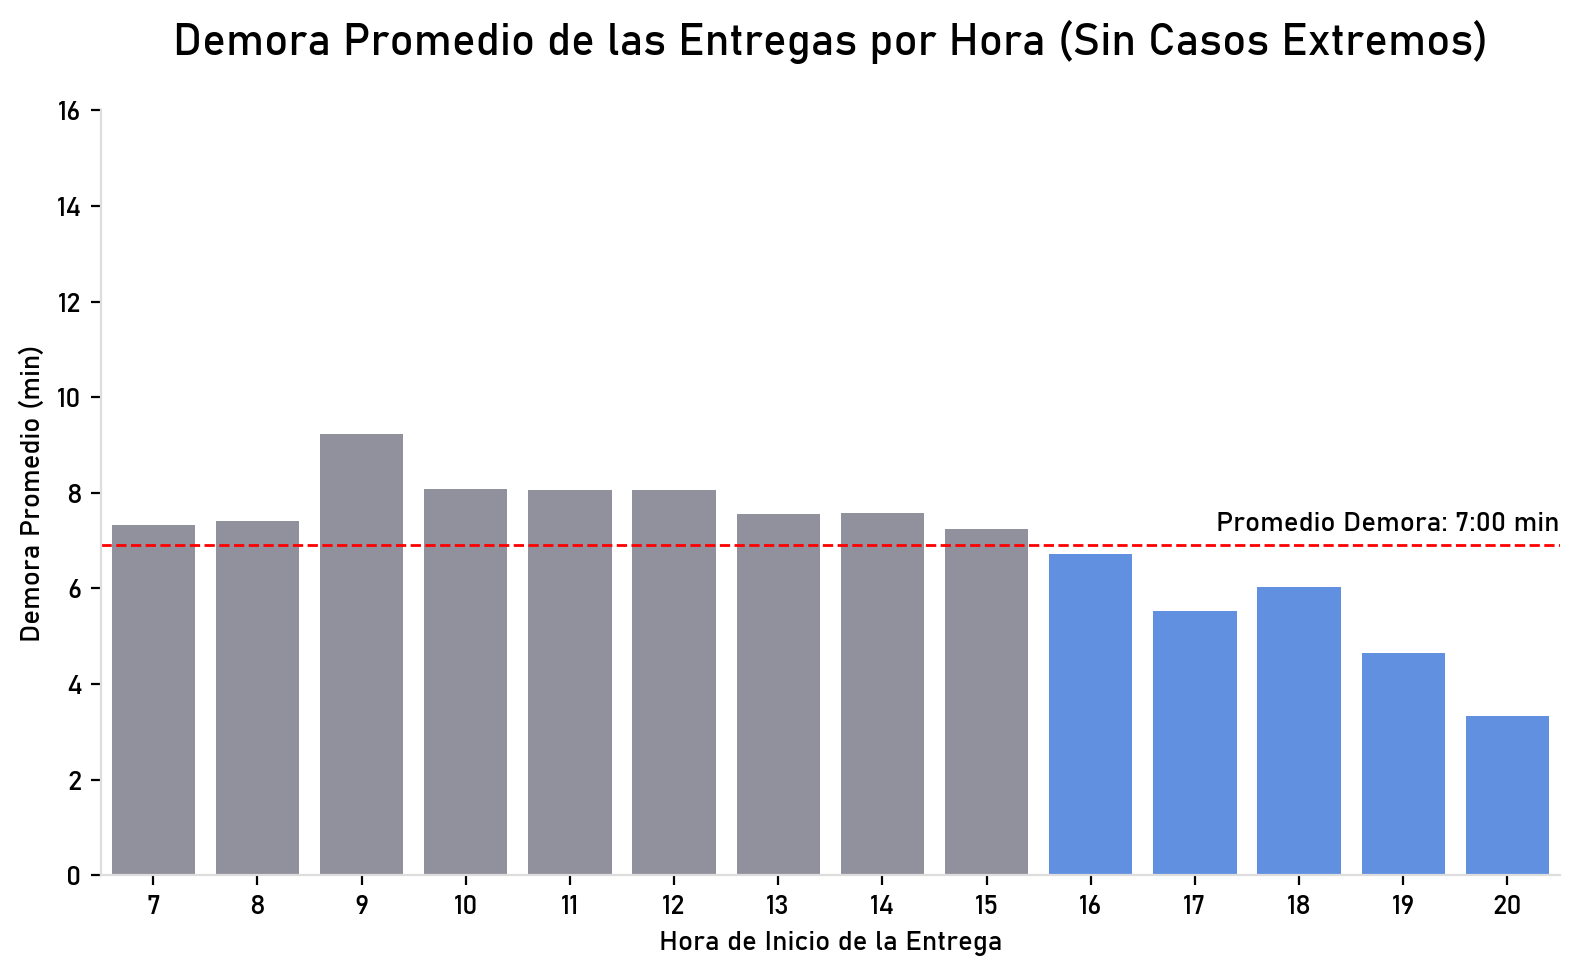

In [25]:
df_con_demora = df_sin_outliers[df_sin_outliers['Demora_Inicio_Fin']!=0]
df_asd = df_con_demora.groupby('VisitaHora_Inicio_UNICO')['Demora_Inicio_Fin'].mean().reset_index()
df_asd['VisitaHora_Inicio_UNICO'] = df_asd['VisitaHora_Inicio_UNICO'].astype(int)


# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

nombre_objetivo = 15
colores = ['#4C8BF5' if x >= 16 else '#8f8f9f' for x in df_asd['VisitaHora_Inicio_UNICO']]

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='VisitaHora_Inicio_UNICO', y='Demora_Inicio_Fin', data=df_asd, palette=colores, width=.8)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(True)  # Mostrar el eje y
ax.axhline(y=df_asd['Demora_Inicio_Fin'].mean(), color='red', linestyle='--', linewidth=1)
ax.text(x=len(df_asd) - 0.5, y=df_asd['Demora_Inicio_Fin'].mean()+0.3, s='Promedio Demora: 7:00 min', 
        color='black', fontsize=10, ha='right')
# Agregar título y etiquetas
plt.title('Demora Promedio de las Entregas por Hora (Sin Casos Extremos)', fontsize=16, fontweight='bold', pad=20)  # Aumentar tamaño y hacer negrita
plt.xlabel('Hora de Inicio de la Entrega')  # Etiqueta para el eje x
plt.ylabel('Demora Promedio (min)')  # Etiqueta para el eje x
plt.ylim(0,16)
# Mostrar el gráfico
plt.tight_layout()
plt.show()


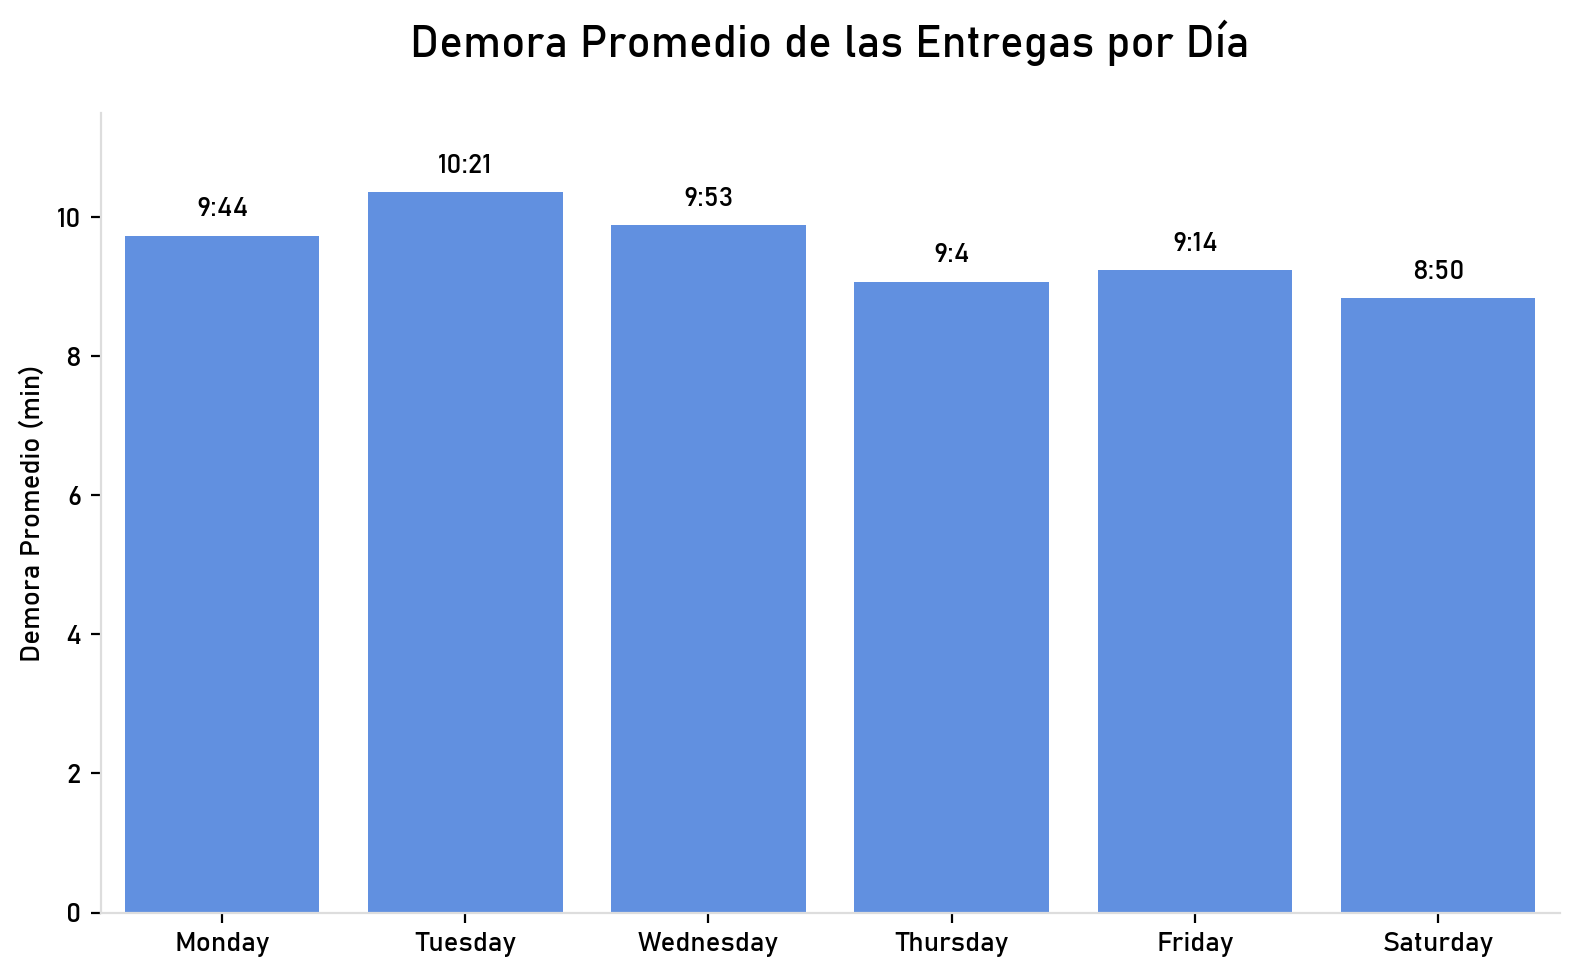

In [26]:
df_con_demora = df[df['Demora_Inicio_Fin']!=0]
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_con_demora_graficar = df_con_demora.groupby('VisitaDia')['Demora_Inicio_Fin'].mean().reindex(dias_semana).reset_index()

# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='VisitaDia', y='Demora_Inicio_Fin', data=df_con_demora_graficar, color='#4C8BF5', width=.8)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(True)  # Mostrar el eje y

# Agregar título y etiquetas
plt.title('Demora Promedio de las Entregas por Día', fontsize=16, fontweight='bold', pad=20)  # Aumentar tamaño y hacer negrita
plt.xlabel('')  # Etiqueta para el eje x
plt.ylabel('Demora Promedio (min)')  # Etiqueta para el eje x
plt.ylim(0,11.5)

for p in ax.patches:
    ax.annotate(f'{p.get_height()//1:.0f}:{(p.get_height() - p.get_height()//1)*60:.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()+0.2), 
                ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


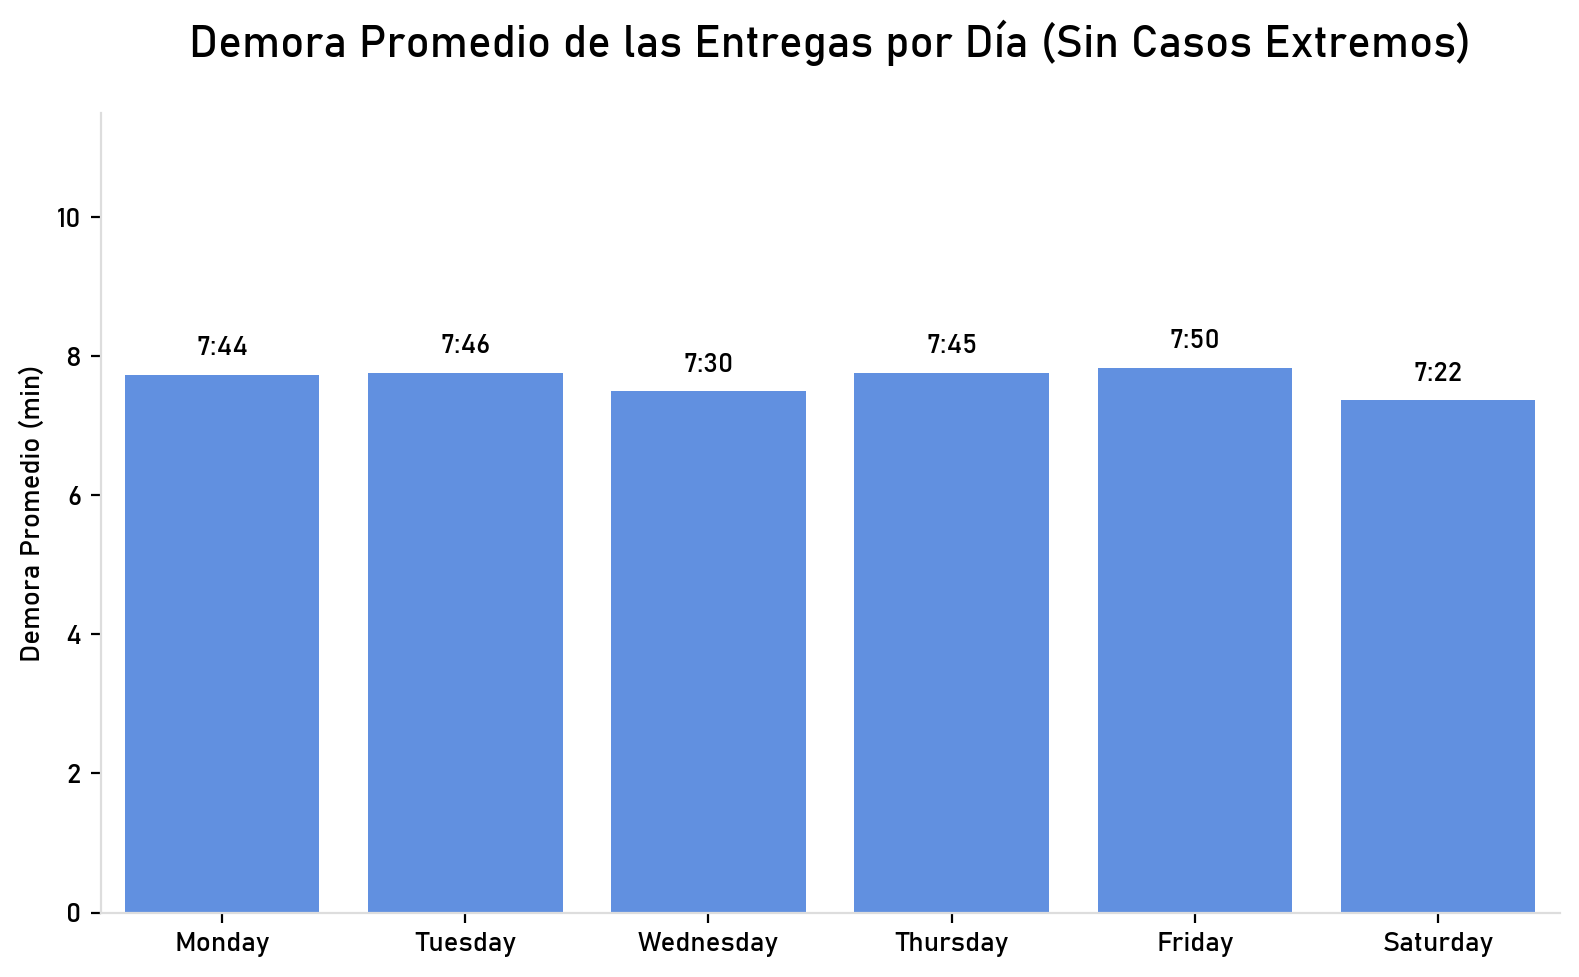

In [27]:
df_con_demora = df[df['Demora_Inicio_Fin'] != 0]
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_con_demora_sin_outliers = df_sin_outliers[df_sin_outliers['Demora_Inicio_Fin'] != 0]
df_con_demora_sin_outliers_graficar = df_con_demora_sin_outliers.groupby('VisitaDia')['Demora_Inicio_Fin'].mean().reindex(dias_semana).reset_index()

# Configurar la fuente
mpl.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='VisitaDia', y='Demora_Inicio_Fin', data=df_con_demora_sin_outliers_graficar, color='#4C8BF5', width=.8)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(True)  # Mostrar el eje y

# Agregar título y etiquetas
plt.title('Demora Promedio de las Entregas por Día (Sin Casos Extremos)', fontsize=16, fontweight='bold', pad=20)  # Aumentar tamaño y hacer negrita
plt.xlabel('')  # Etiqueta para el eje x
plt.ylabel('Demora Promedio (min)')  # Etiqueta para el eje y
plt.ylim(0, 11.5)

# Agregar los valores de cada barra encima de ellas
for p in ax.patches:
    ax.annotate(f'{p.get_height()//1:.0f}:{(p.get_height()-7)*60:.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()+0.2), 
                ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


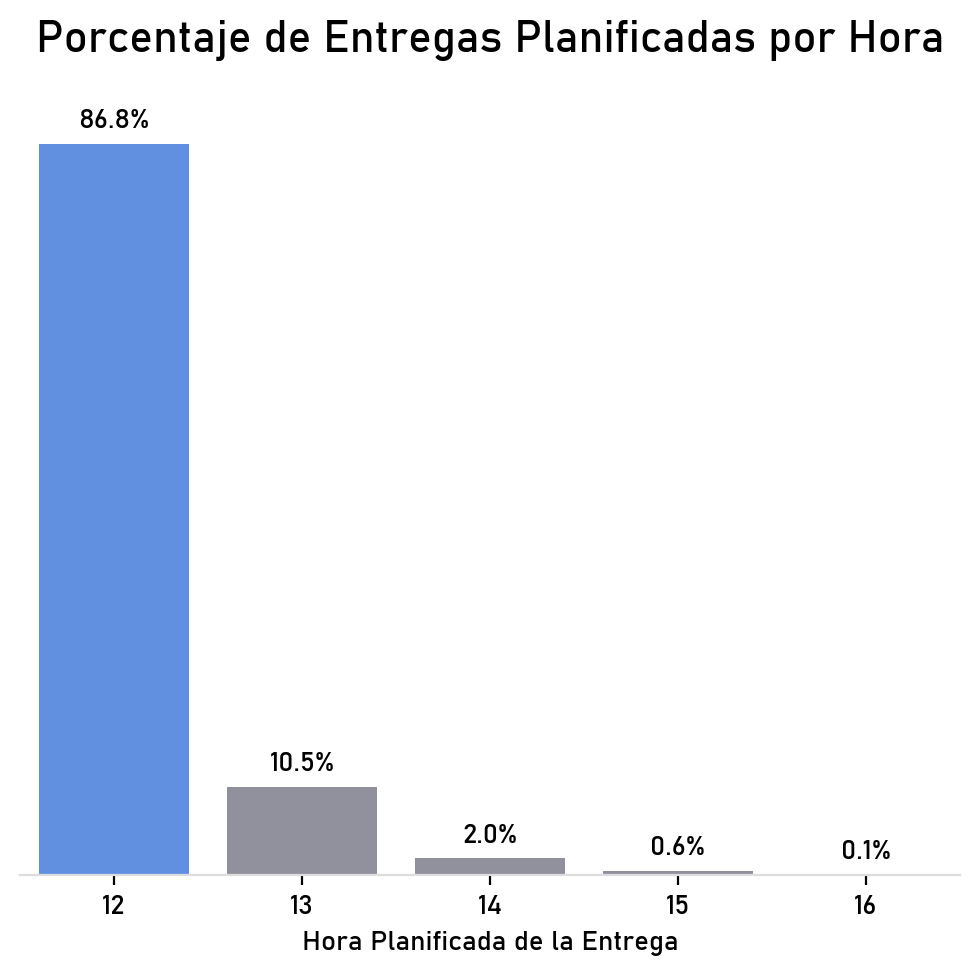

In [28]:
# Convertir la columna 'VisitaPlanificada' a datetime y extraer la hora
df['VisitaPlanificada_Hora_UNICO'] = pd.to_datetime(df['VisitaPlanificada']).dt.hour

# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_horas = df['VisitaPlanificada_Hora_UNICO'].value_counts().reset_index()
count_horas['VisitaPlanificada_Hora_UNICO'] = count_horas['VisitaPlanificada_Hora_UNICO'].div(count_horas['VisitaPlanificada_Hora_UNICO'].sum())
count_horas['index'] = count_horas['index'].astype(int)

# Configurar la fuente
plt.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='index', y='VisitaPlanificada_Hora_UNICO', data=count_horas, palette=['#4C8BF5'] + ['#8f8f9f']*(len(count_horas)-1), width=.8)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)

# Agregar título y etiquetas
plt.title('Porcentaje de Entregas Planificadas por Hora', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Hora Planificada de la Entrega')
plt.ylabel('')

# Agregar anotaciones en porcentaje encima de cada barra
for p in ax.patches:
    porcentaje = f'{p.get_height() * 100:.1f}%'
    ax.annotate(porcentaje, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), 
                textcoords='offset points')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


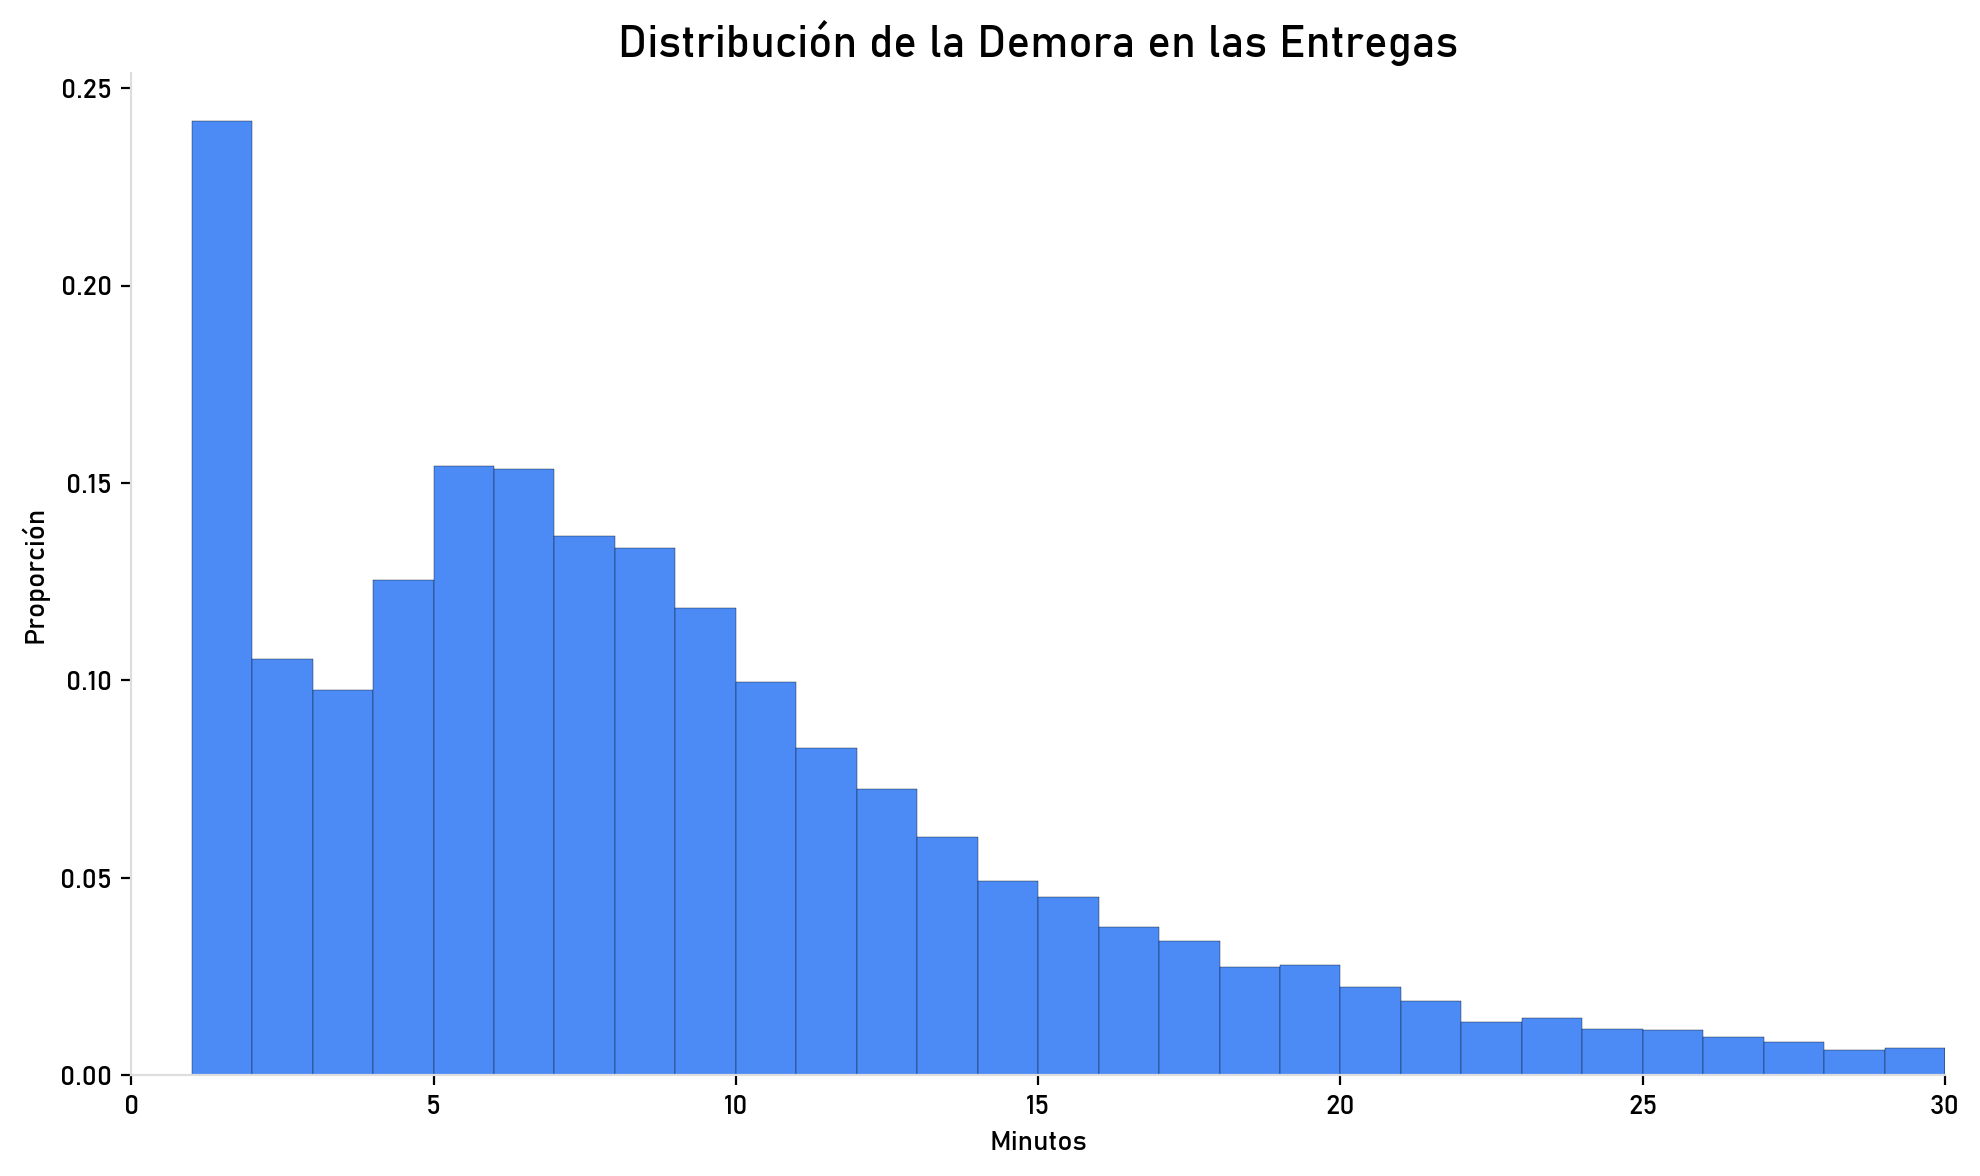

In [29]:
# Prepare the data
asdasdasd = df[df['Demora_Inicio_Fin'] != 0].copy()
asdasdasd = asdasdasd.dropna()
asdasdasd['Demora_Inicio_Fin'] = asdasdasd['Demora_Inicio_Fin'].astype(int)
asdasdasd = asdasdasd[asdasdasd['Demora_Inicio_Fin'] != 0].groupby('cliente')['Demora_Inicio_Fin'].value_counts(normalize=True).reset_index(name='count')

# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=asdasdasd, x='Demora_Inicio_Fin', weights='count',
                  bins=range(asdasdasd['Demora_Inicio_Fin'].min(), asdasdasd['Demora_Inicio_Fin'].max() + 1),
                  kde=False, color='#4C8BF5', alpha=1)

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

# Add title and labels
plt.title('Distribución de la Demora en las Entregas', fontsize=16, fontweight='bold')
plt.xlabel('Minutos')
plt.ylabel('Proporción')
plt.xlim(0, 30)
# plt.ylim(0,0.14)
# Show the plot
plt.tight_layout()
plt.show()


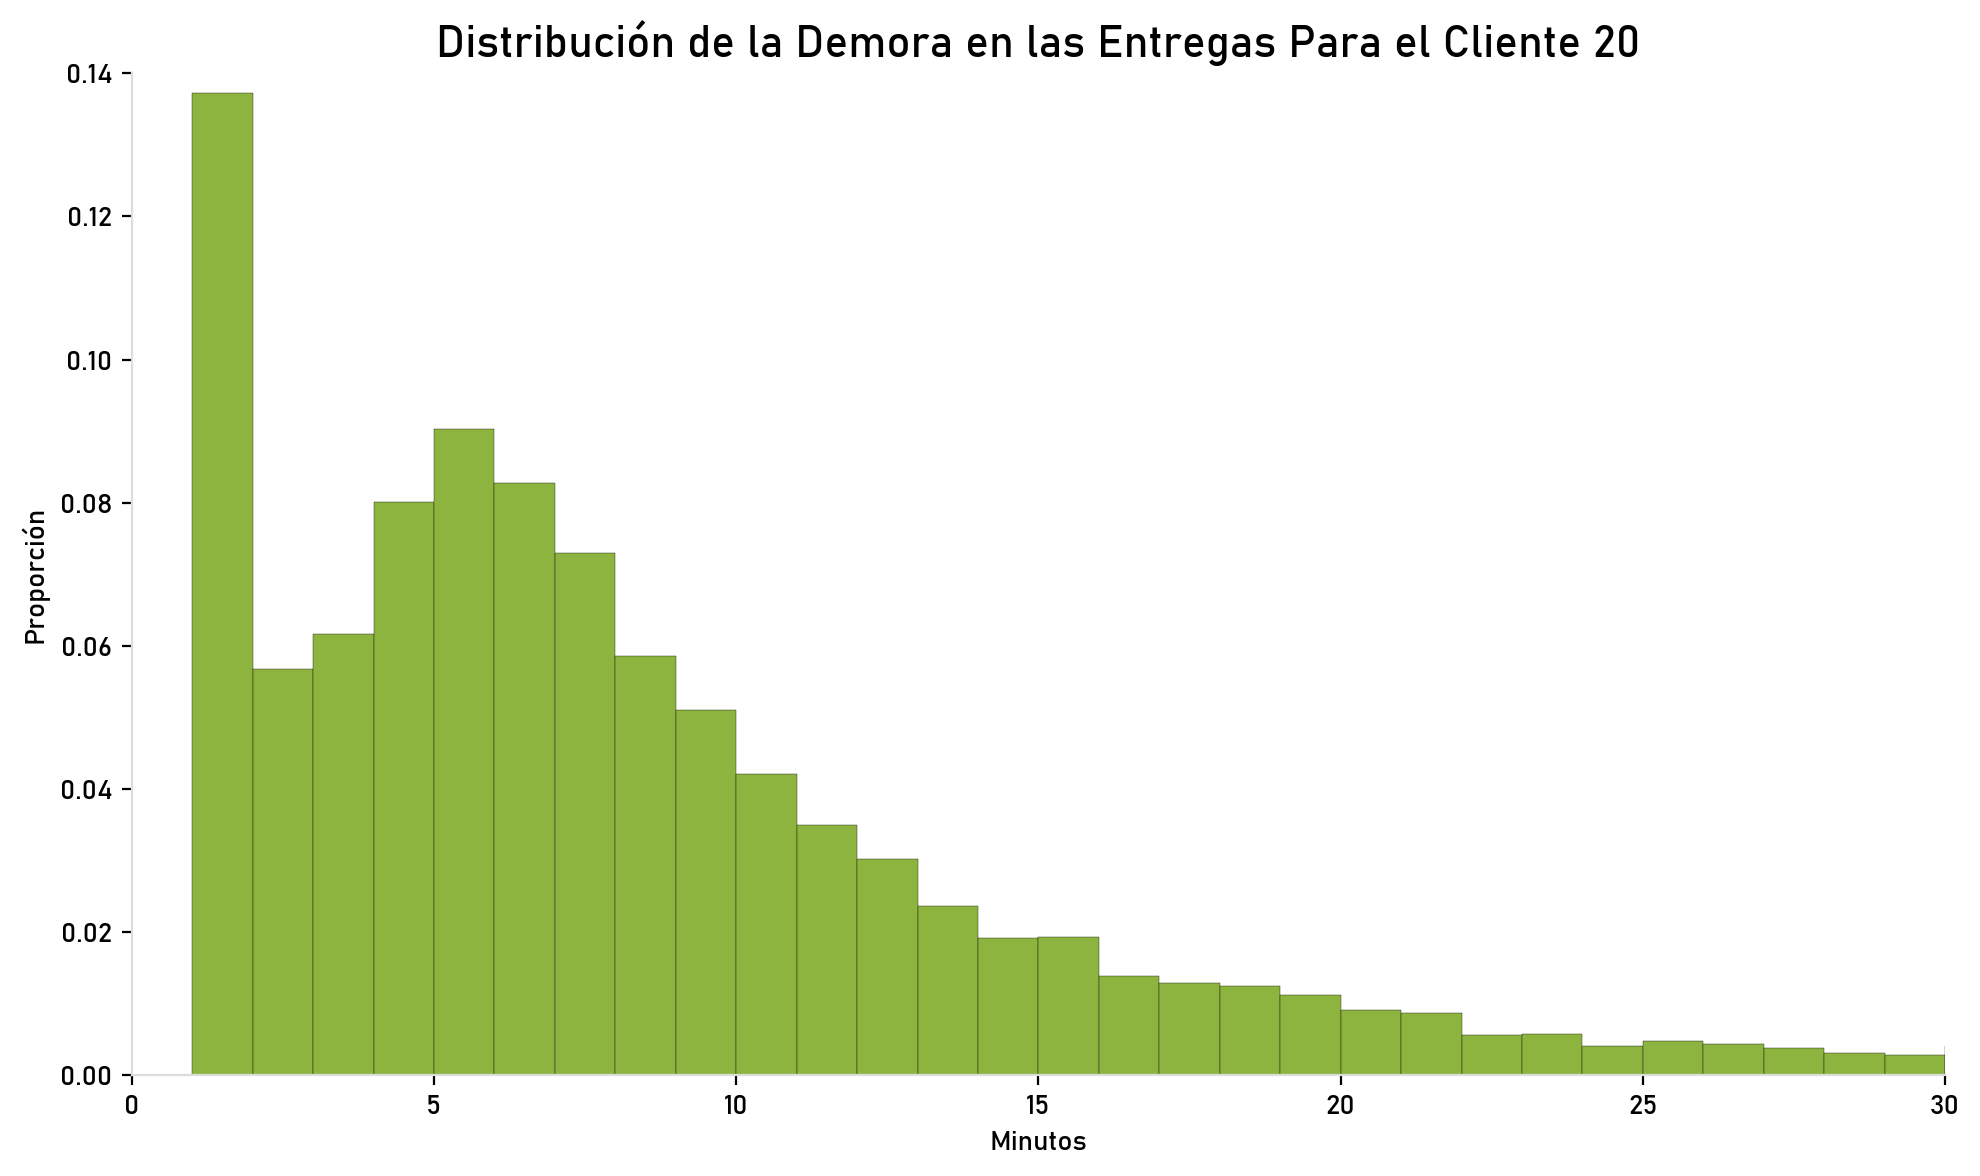

In [30]:
# Prepare the data
asdasdasd = df[df['Demora_Inicio_Fin'] != 0].copy()
asdasdasd = asdasdasd.dropna()
asdasdasd['Demora_Inicio_Fin'] = asdasdasd['Demora_Inicio_Fin'].astype(int)
asdasdasd = asdasdasd[asdasdasd['Demora_Inicio_Fin'] != 0].groupby('cliente')['Demora_Inicio_Fin'].value_counts(normalize=True).reset_index(name='count')
asdasdasd_20 = asdasdasd[asdasdasd['cliente'] == 20]

# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=asdasdasd_20, x='Demora_Inicio_Fin', weights='count',
                  bins=range(asdasdasd_20['Demora_Inicio_Fin'].min(), asdasdasd_20['Demora_Inicio_Fin'].max() + 1),
                  kde=False, color='#8eb440', alpha=1)

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

# Add title and labels
plt.title('Distribución de la Demora en las Entregas Para el Cliente 20', fontsize=16, fontweight='bold')
plt.xlabel('Minutos')
plt.ylabel('Proporción')
plt.xlim(0, 30)
plt.ylim(0,0.14)
# Show the plot
plt.tight_layout()
plt.show()


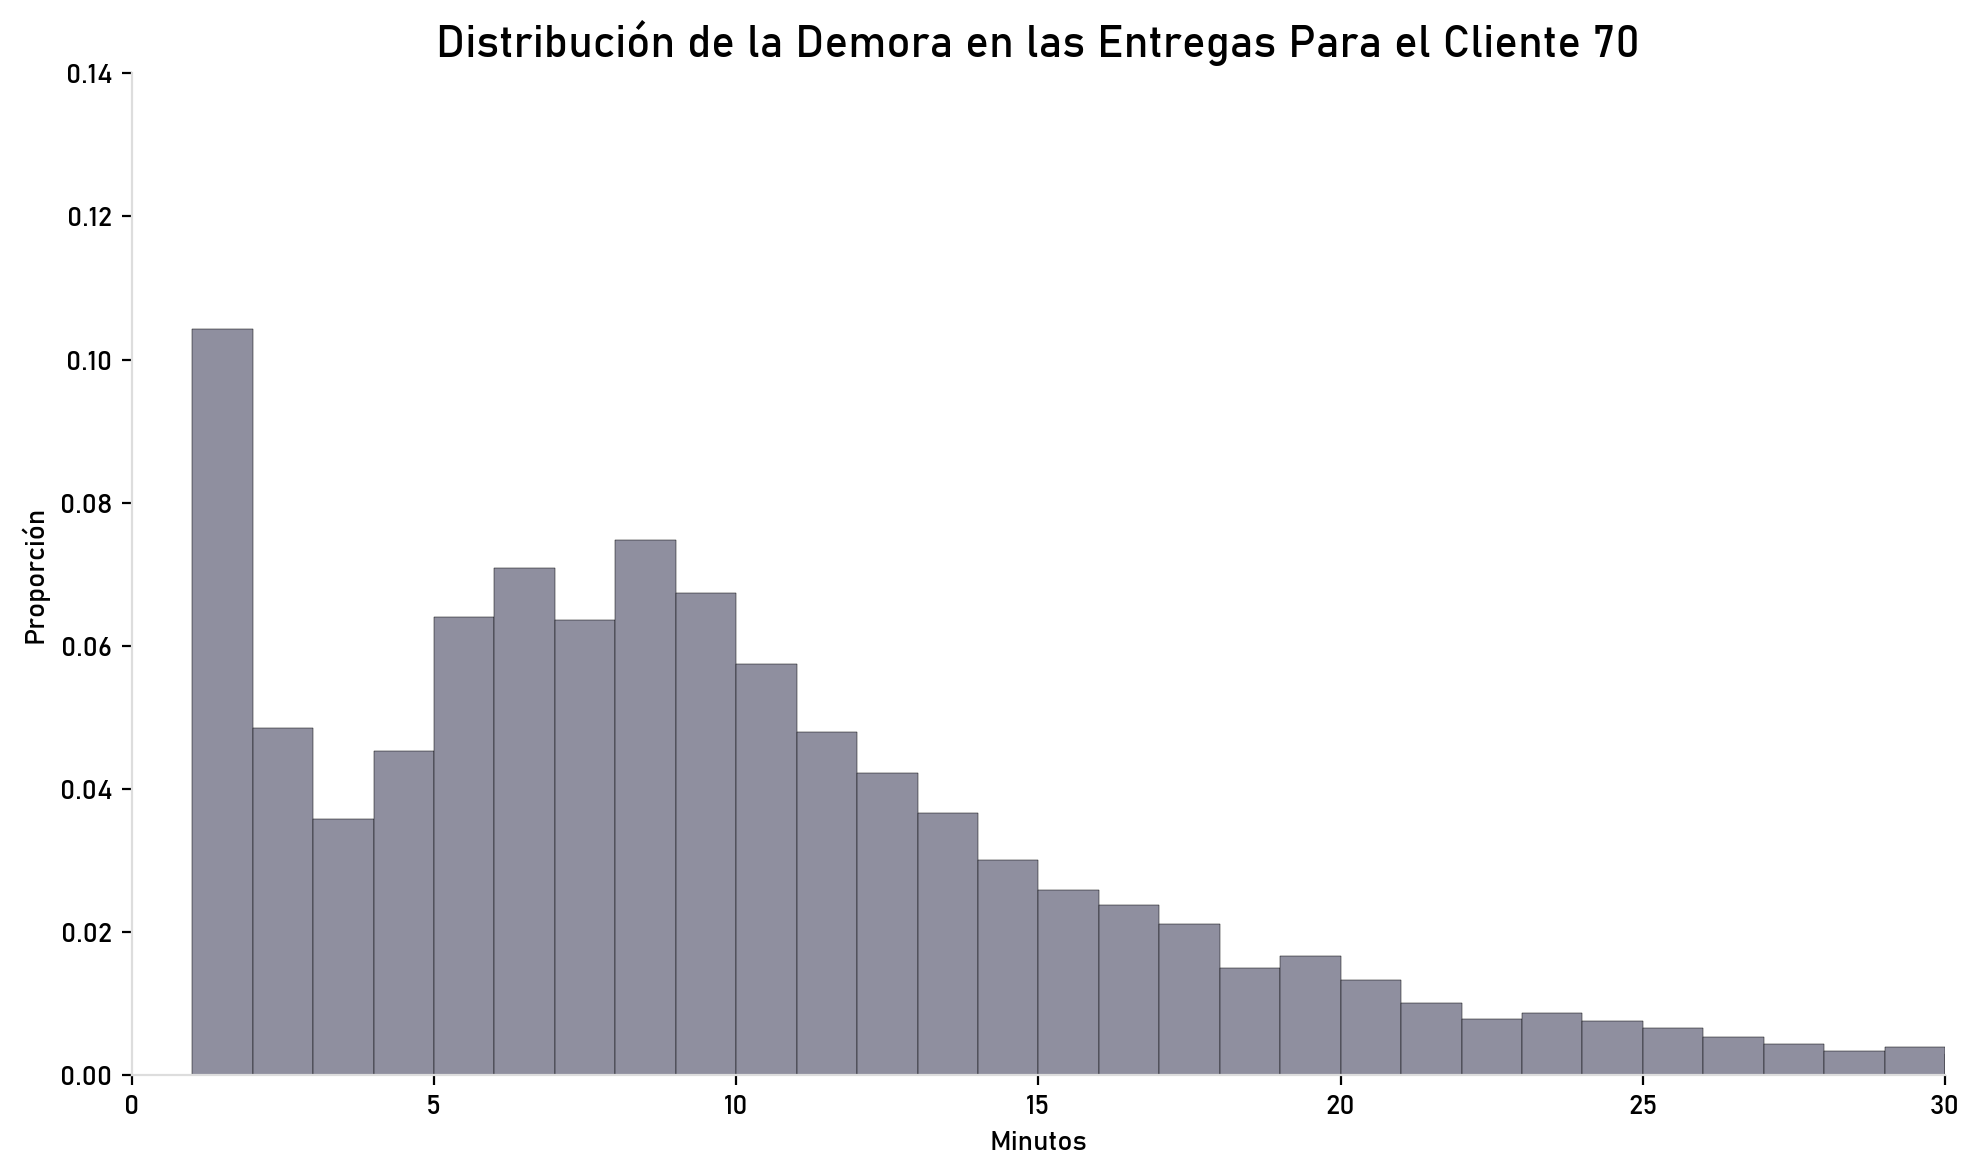

In [31]:
# Prepare the data
asdasdasd = df[df['Demora_Inicio_Fin'] != 0].copy()
asdasdasd = asdasdasd.dropna()
asdasdasd['Demora_Inicio_Fin'] = asdasdasd['Demora_Inicio_Fin'].astype(int)
asdasdasd = asdasdasd[asdasdasd['Demora_Inicio_Fin'] != 0].groupby('cliente')['Demora_Inicio_Fin'].value_counts(normalize=True).reset_index(name='count')
asdasdasd_70 = asdasdasd[asdasdasd['cliente'] == 70]

# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=asdasdasd_70, x='Demora_Inicio_Fin', weights='count',
                  bins=range(asdasdasd_70['Demora_Inicio_Fin'].min(), asdasdasd_70['Demora_Inicio_Fin'].max() + 1),
                  kde=False, color='#8f8f9f', alpha=1)

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

# Add title and labels
plt.title('Distribución de la Demora en las Entregas Para el Cliente 70', fontsize=16, fontweight='bold')
plt.xlabel('Minutos')
plt.ylabel('Proporción')
plt.xlim(0, 30)
plt.ylim(0,0.14)
# Show the plot
plt.tight_layout()
plt.show()


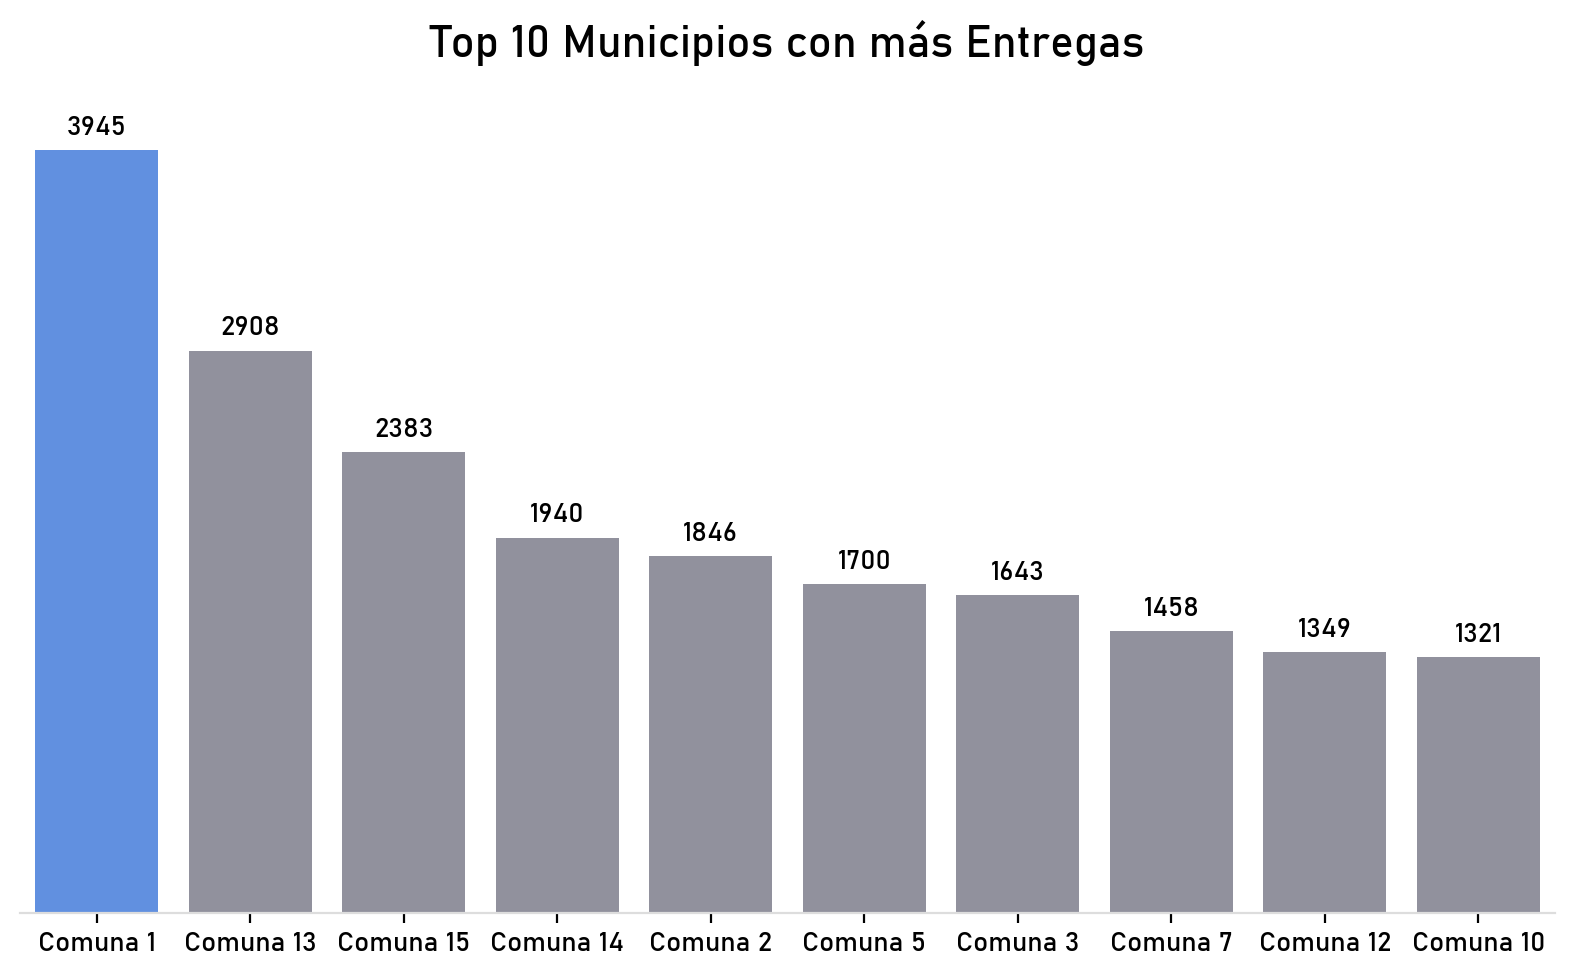

In [32]:
# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_municipio = df['municipio'].value_counts().reset_index()
count_municipio['municipio_proporcion'] = count_municipio['municipio'].div(count_municipio['municipio'].sum())

# Configurar la fuente
plt.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='index', y='municipio', data=count_municipio.head(10), palette=['#4C8BF5'] + ['#8f8f9f']*(len(count_municipio)-1), width=.8)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)

# Agregar título y etiquetas
plt.title('Top 10 Municipios con más Entregas', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('Cantidad de Entregas')

# Agregar anotaciones en porcentaje encima de cada barra
for p in ax.patches:
    porcentaje = f'{p.get_height():.0f}'
    ax.annotate(porcentaje, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), 
                textcoords='offset points')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


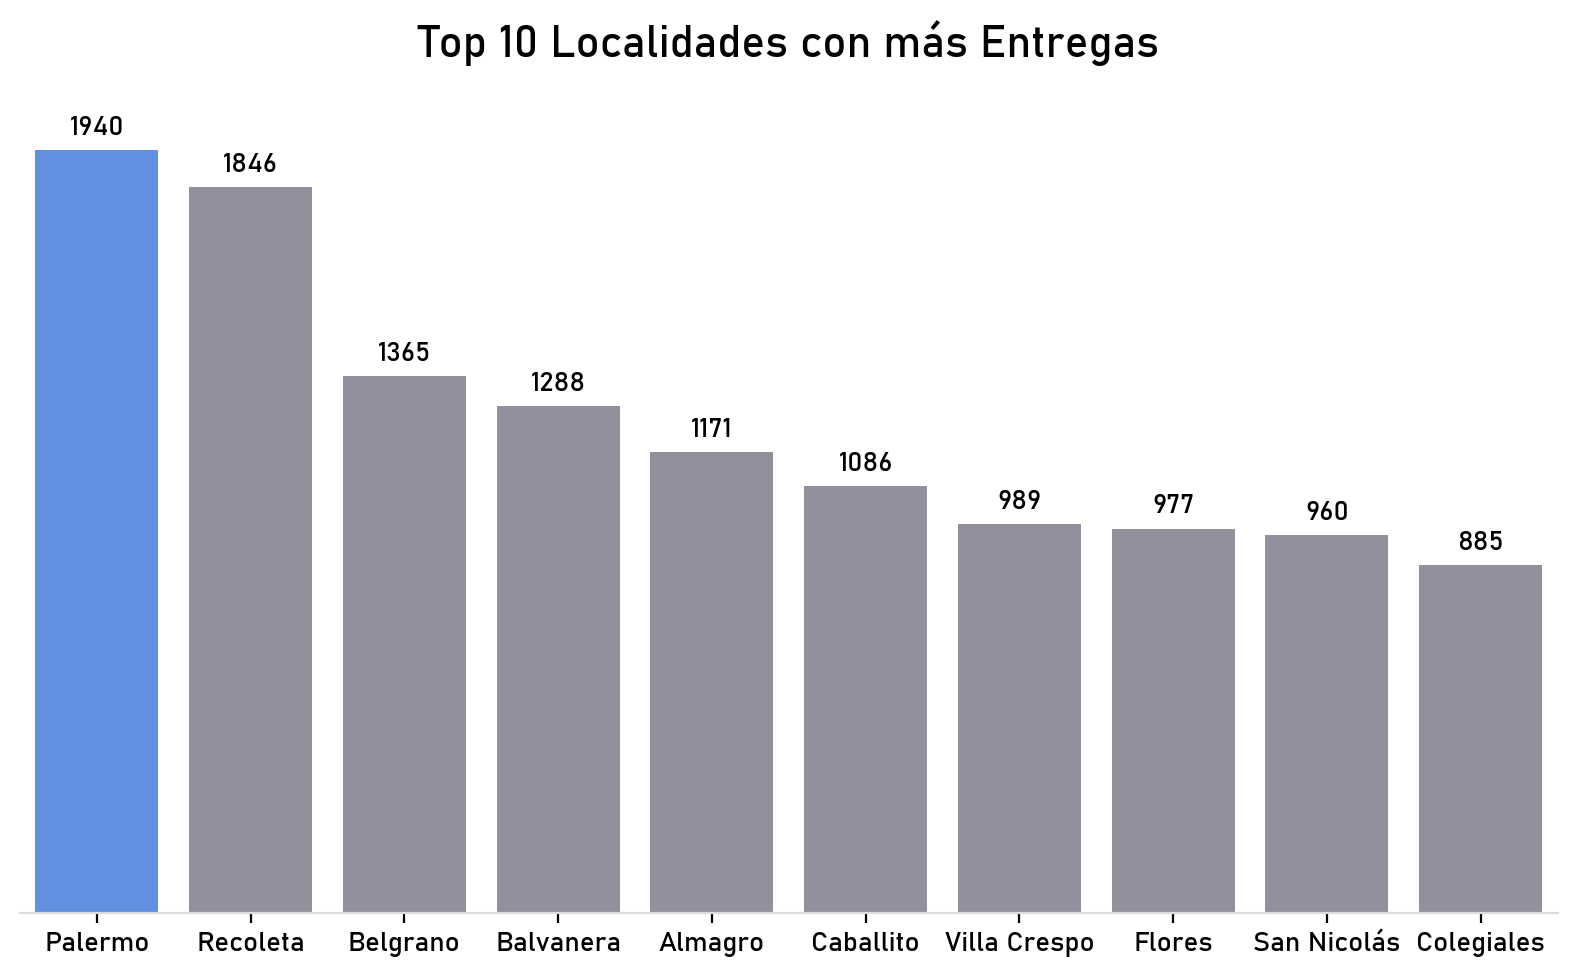

In [33]:
# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_localidad = df['localidad'].value_counts().reset_index()
count_localidad['localidad_proporcion'] = count_localidad['localidad'].div(count_localidad['localidad'].sum())

# Configurar la fuente
plt.rcParams['font.family'] = 'Bahnschrift'

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='index', y='localidad', data=count_localidad.head(10), palette=['#4C8BF5'] + ['#8f8f9f']*(len(count_localidad)-1), width=.8)

# Personalizar apariencia
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.yaxis.set_visible(False)

# Agregar título y etiquetas
plt.title('Top 10 Localidades con más Entregas', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('Cantidad de Entregas')

# Agregar anotaciones en porcentaje encima de cada barra
for p in ax.patches:
    porcentaje = f'{p.get_height():.0f}'
    ax.annotate(porcentaje, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 8), 
                textcoords='offset points')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
